# Forest Cover Type Prediction

## Import modules

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Load the data set

In [65]:
df = pd.read_csv("train.csv")

# shape
print(df.shape)
df.head()

(15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [66]:
# See the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [67]:
# Check for missing values
df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


Comment:

* There is 15119 observations and 56 columns with no missing values.
* The dataset is already encoded. So, no need for encoding further

## EDA

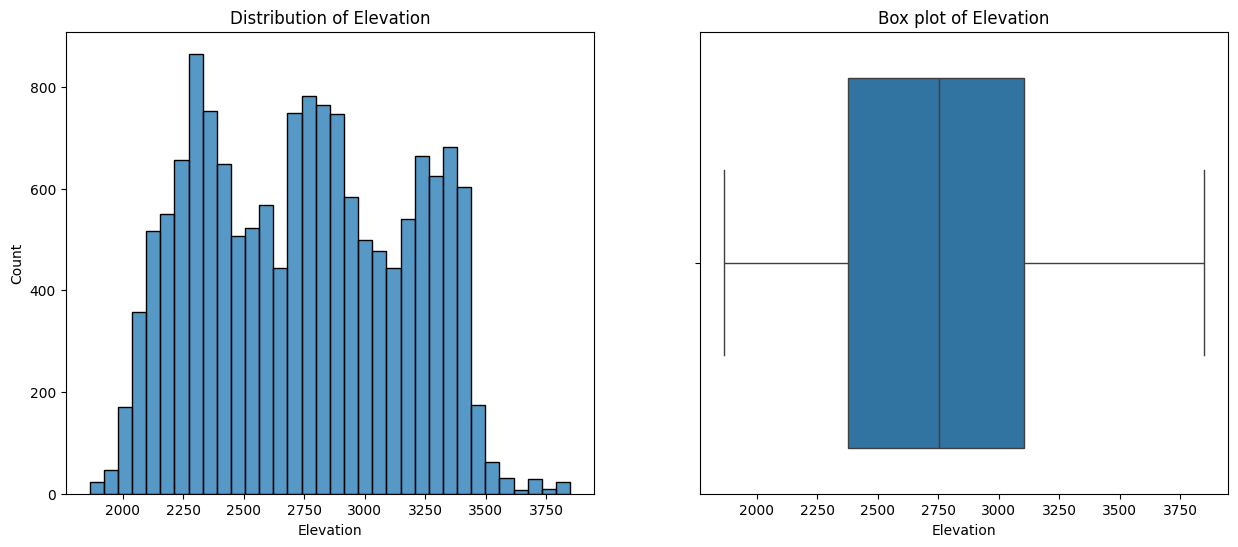

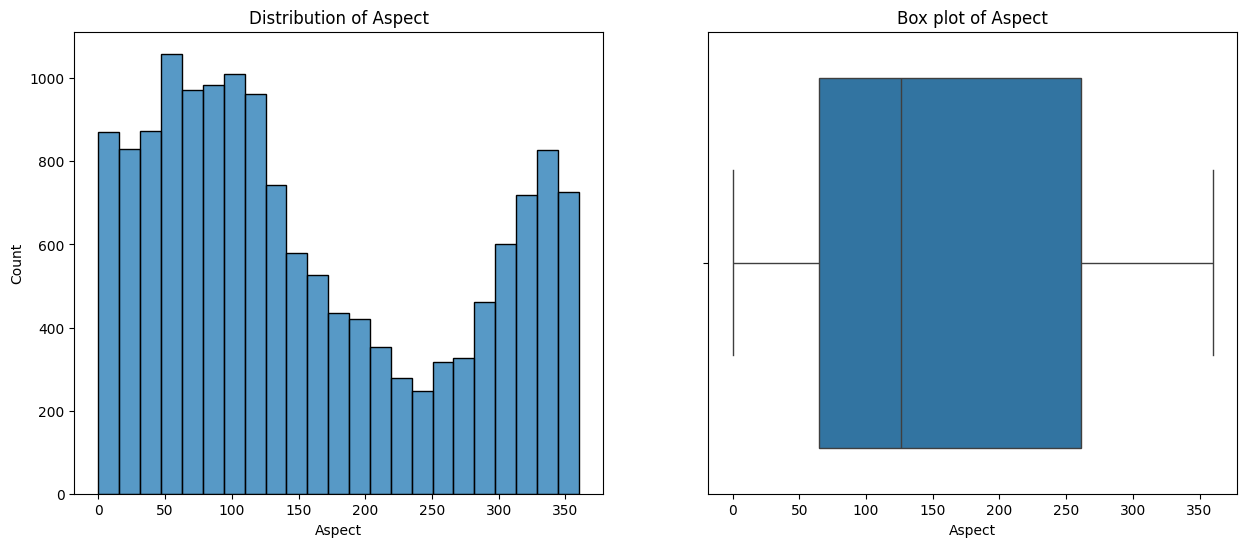

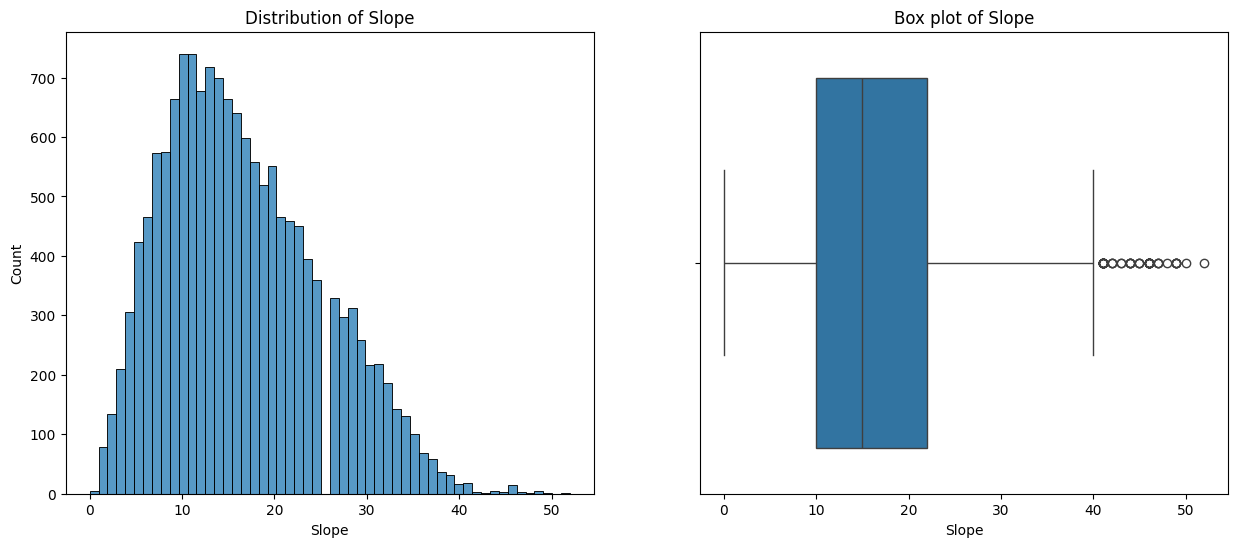

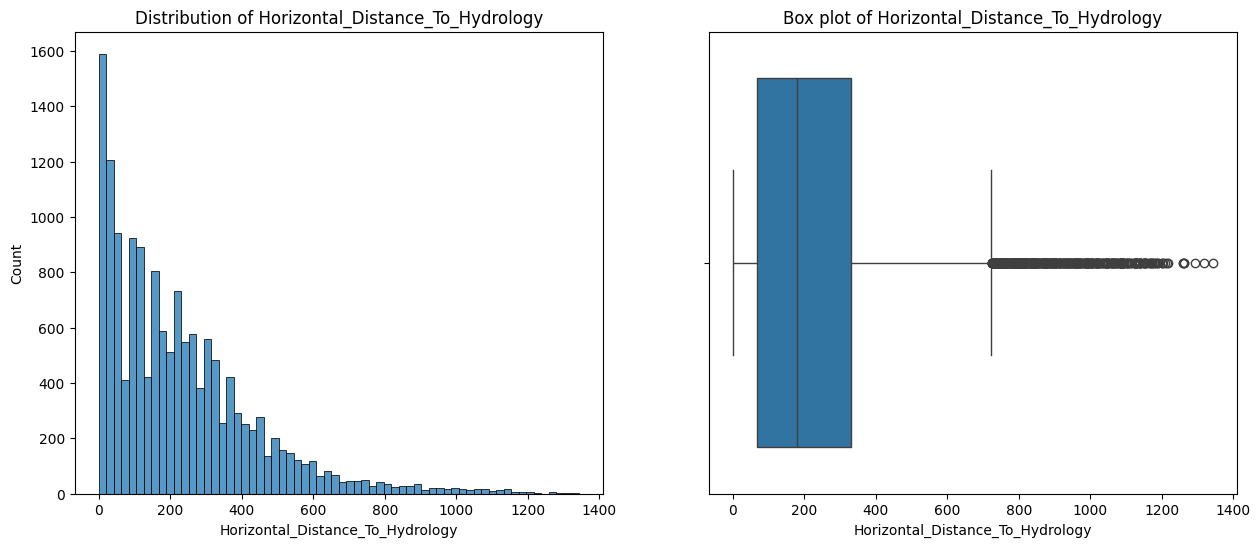

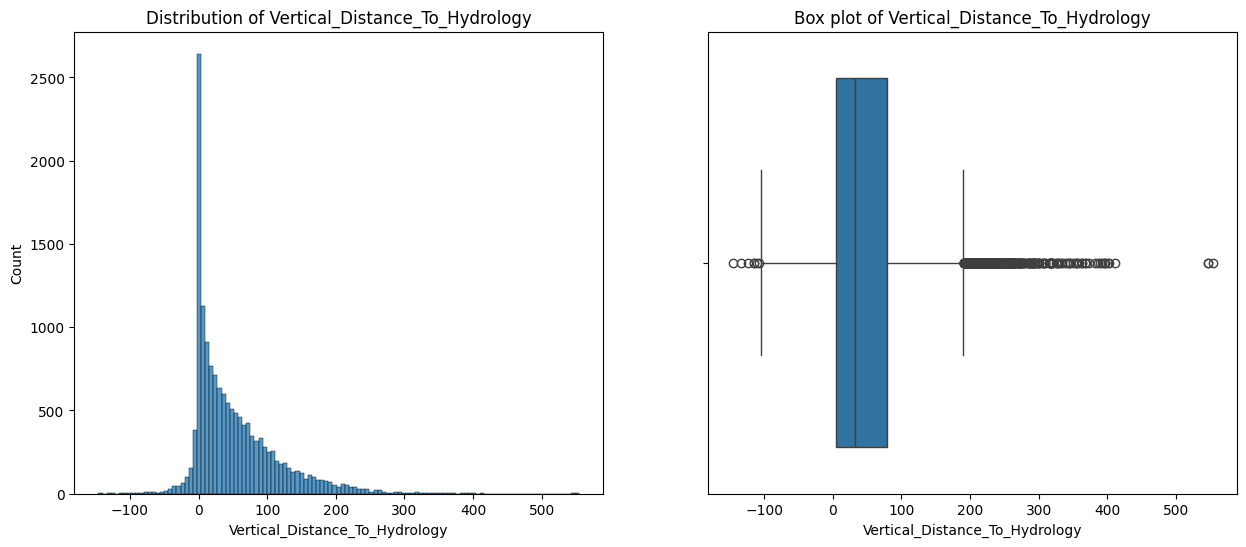

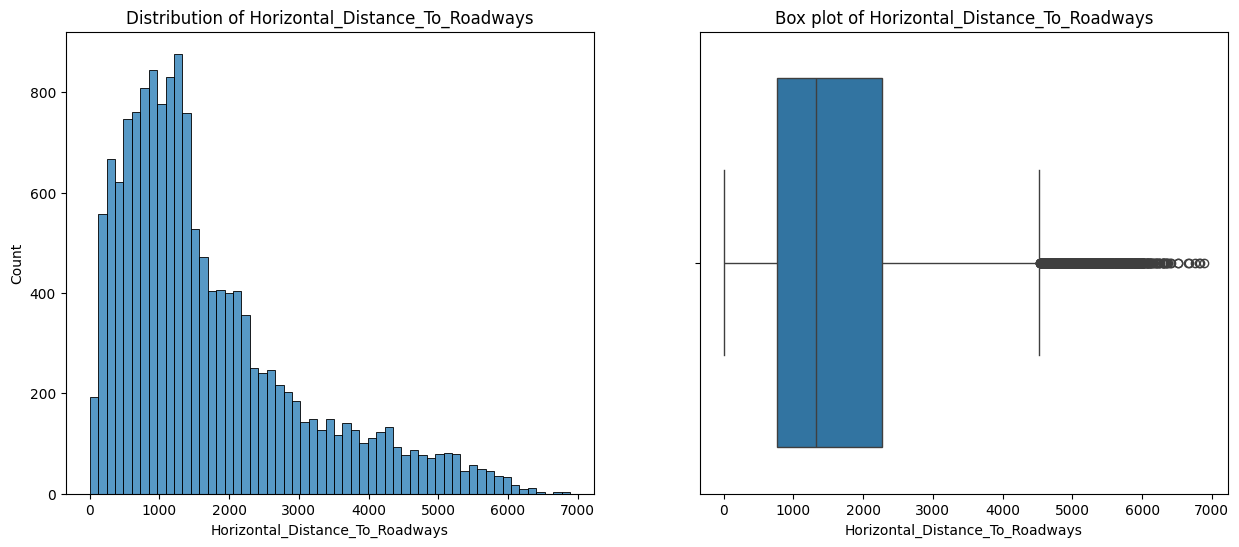

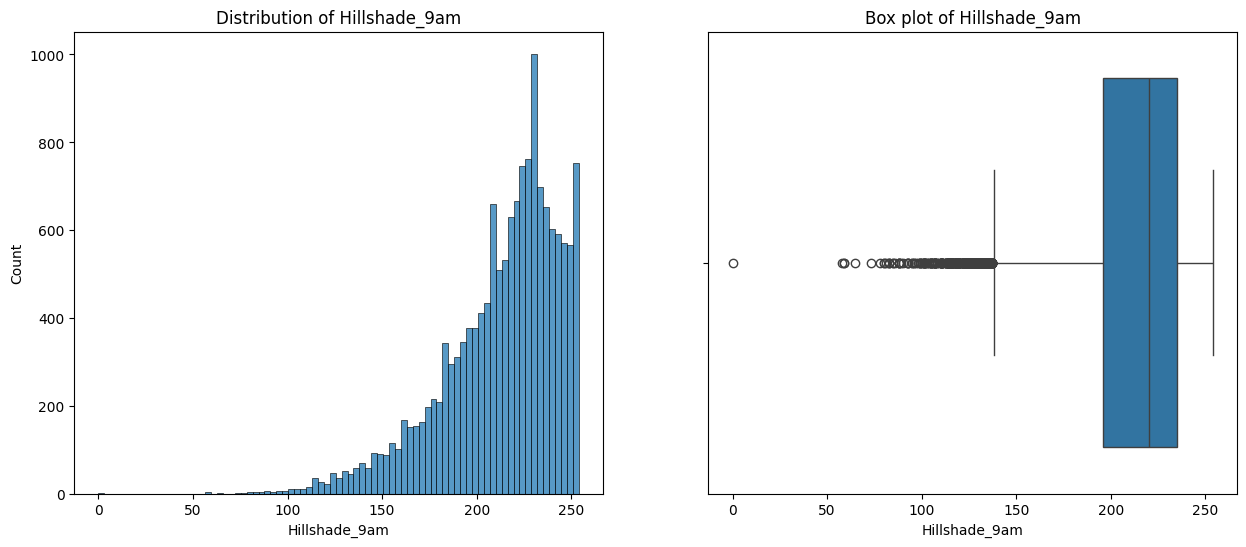

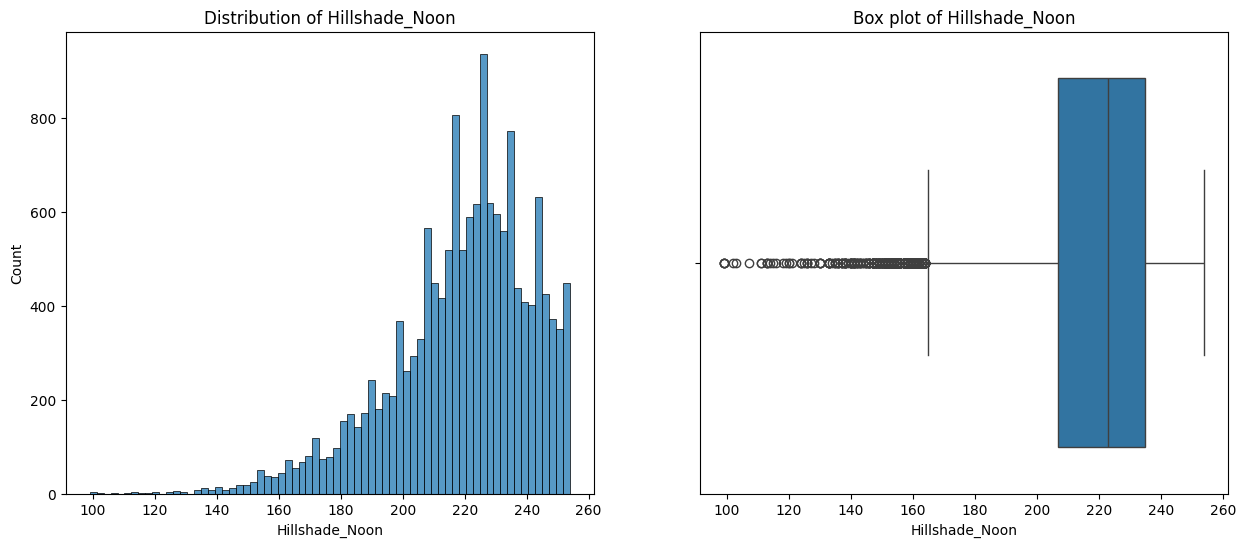

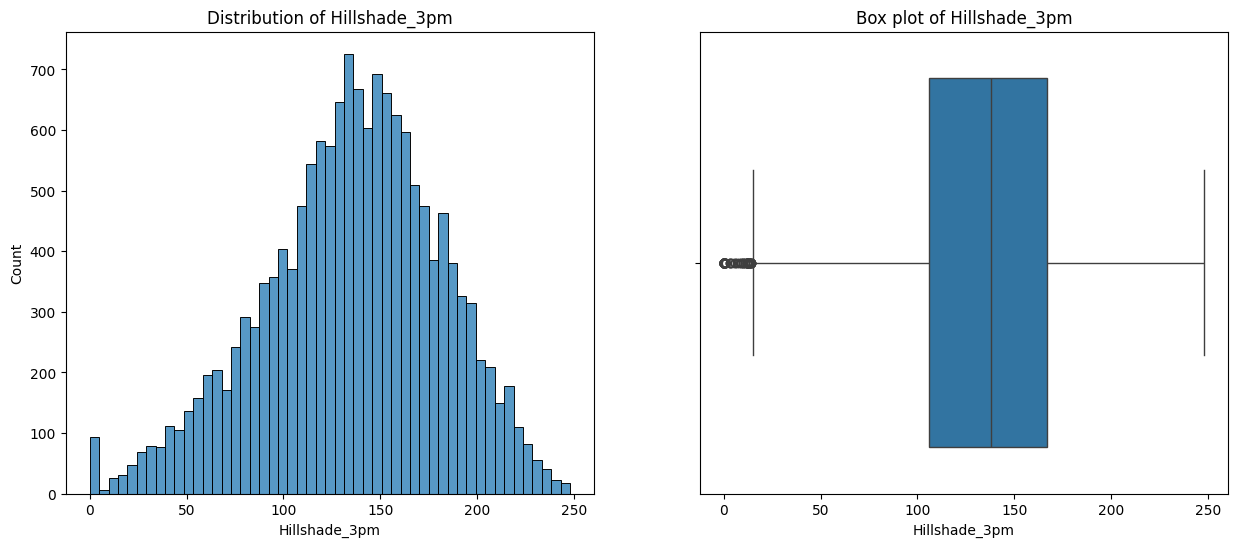

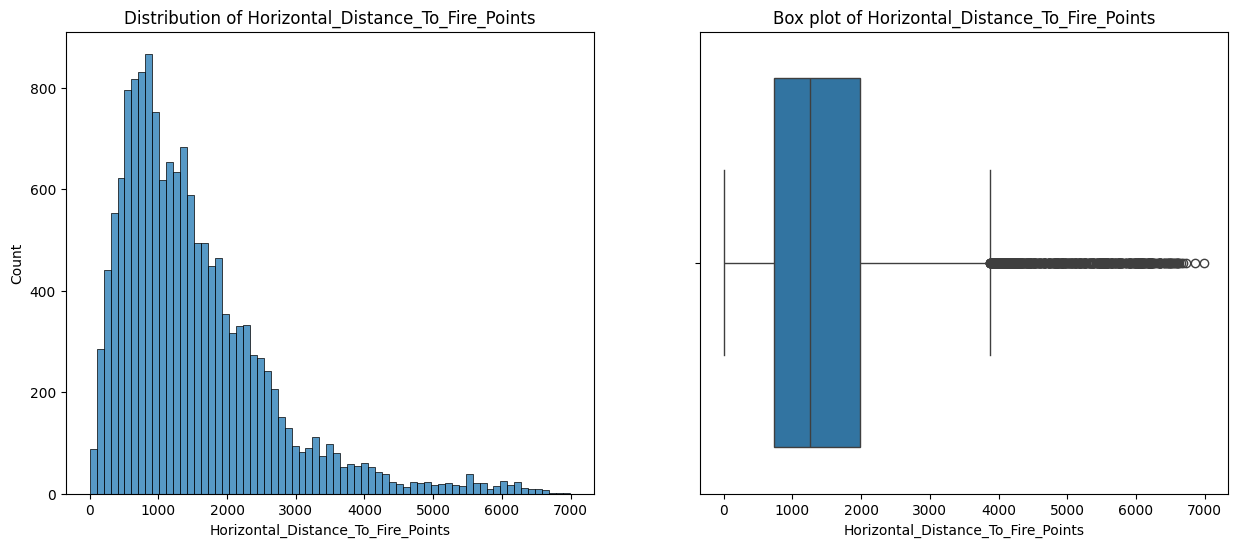

In [68]:
## Check for outliers
cols = df.iloc[:,1:11].columns
for col in cols:
    plt.figure(figsize=(15,6))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df, orient='h')
    plt.title(f"Box plot of {col}")

**Comment:**

There is too much outliers in the dataset. Whether we will remove those or not it depends on data balancing. If data is balanced, then we will handle those outliers by standard scaling rather than removing them.

In [69]:
## Check whether data is balance or not
round(df['Cover_Type'].value_counts(normalize=True)*100, 2)

Cover_Type
5    14.29
2    14.29
1    14.29
7    14.29
3    14.29
6    14.29
4    14.29
Name: proportion, dtype: float64

**Comment:**

We are seeing that data is already balanced. So, we should not remove outliers. We will handle it with scaling (standardization)

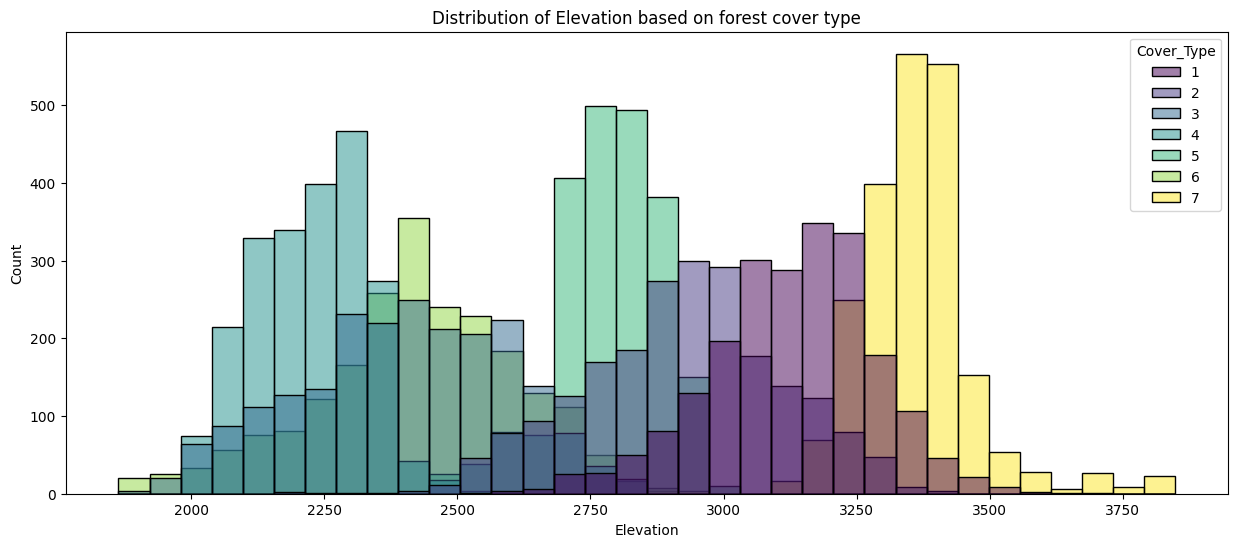

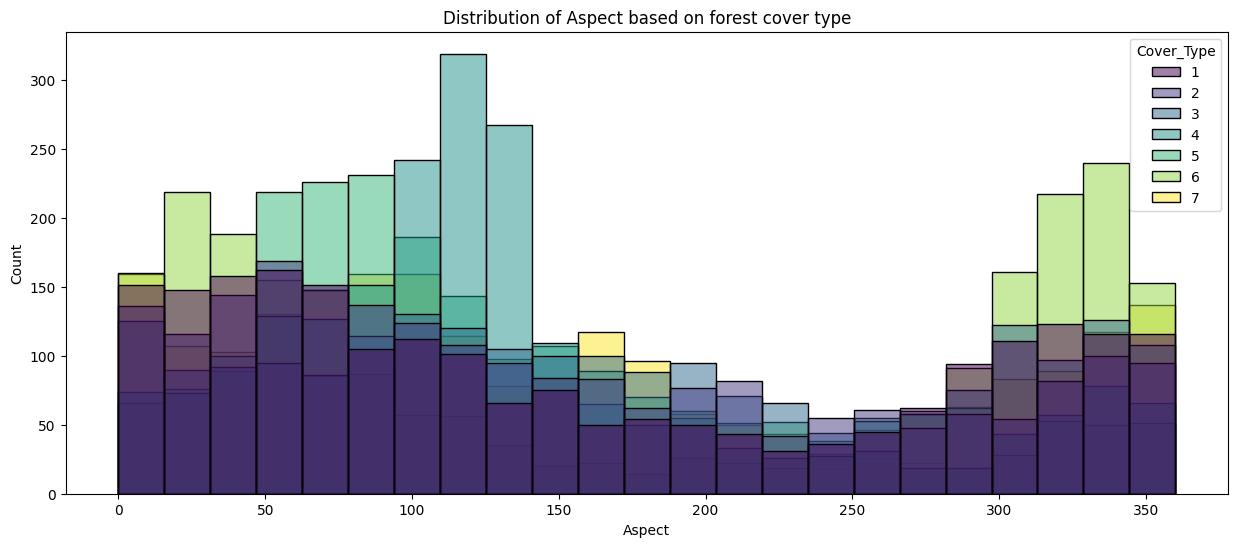

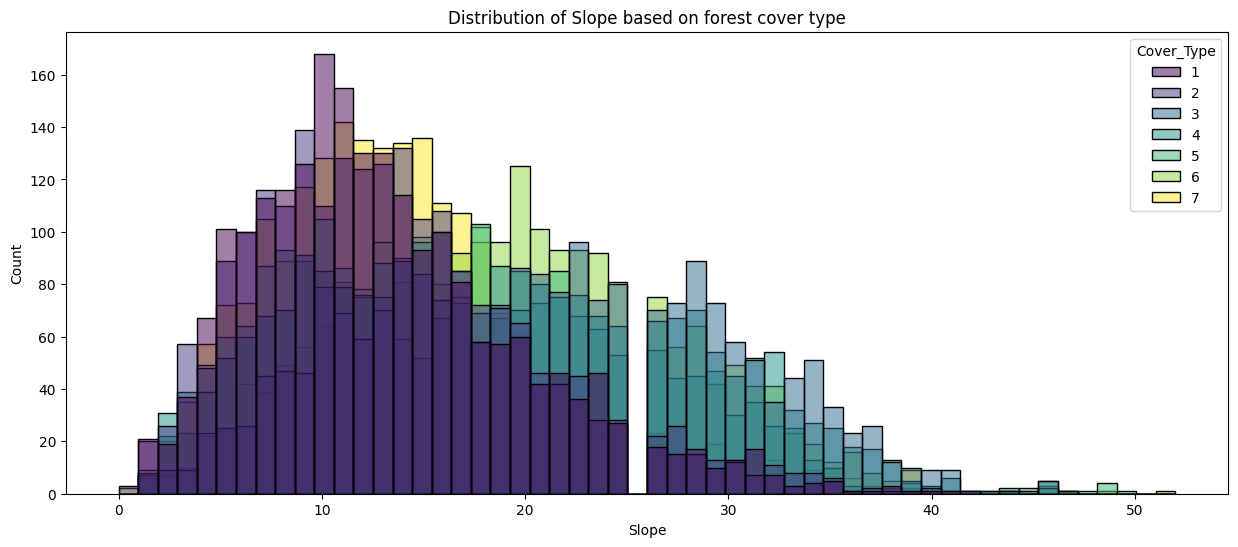

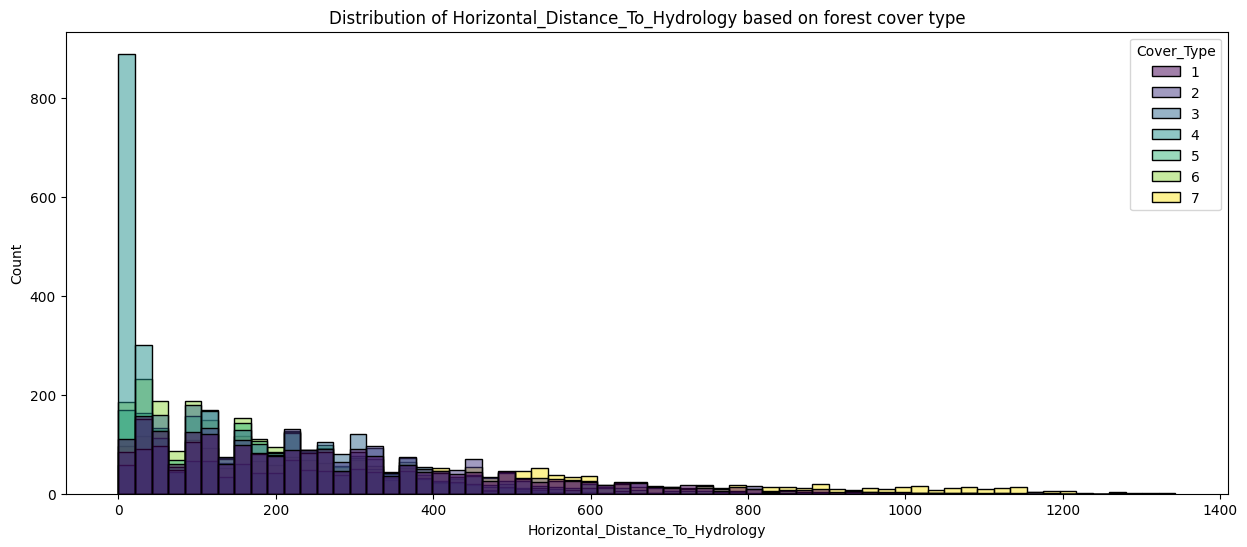

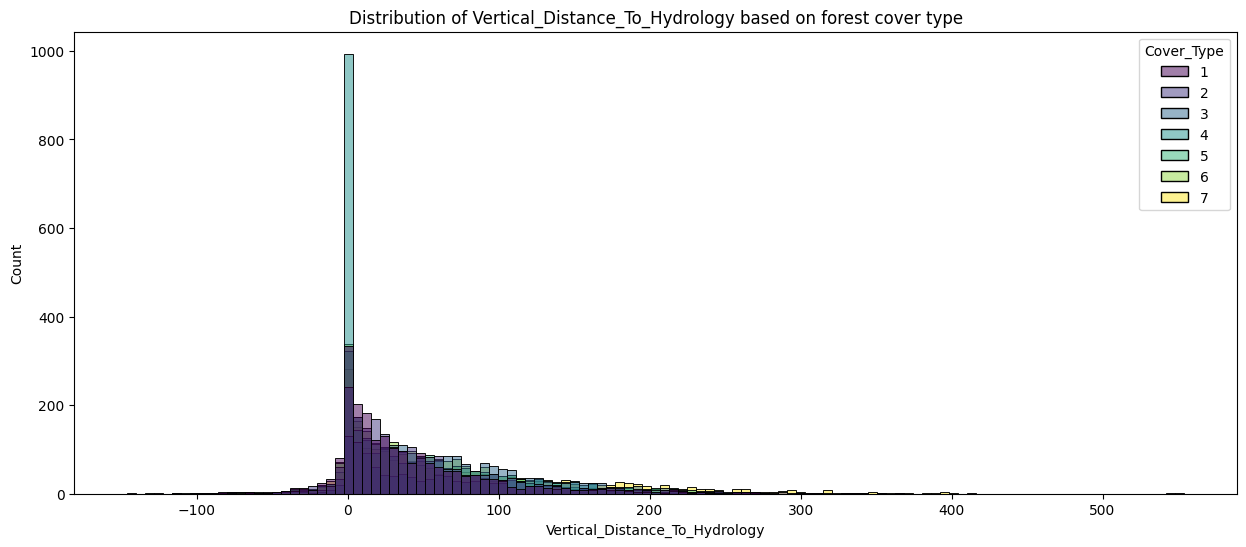

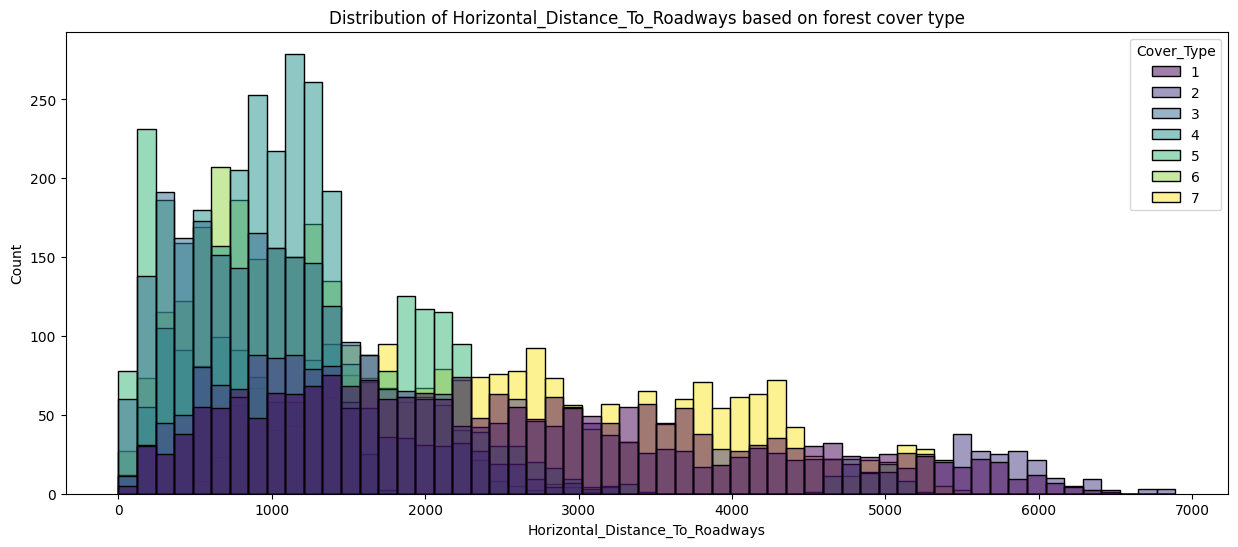

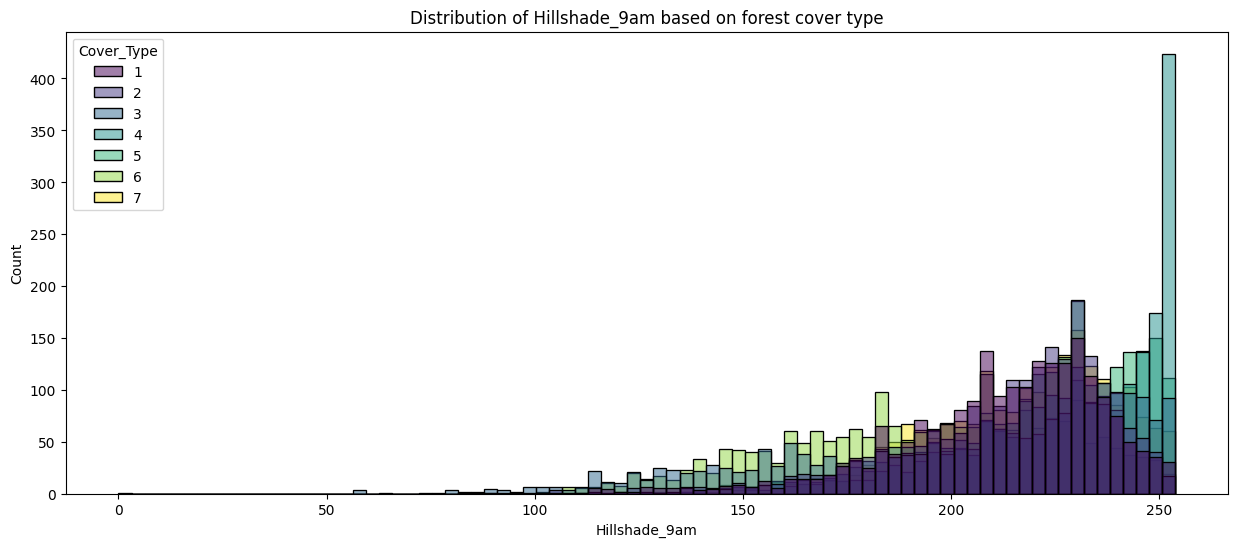

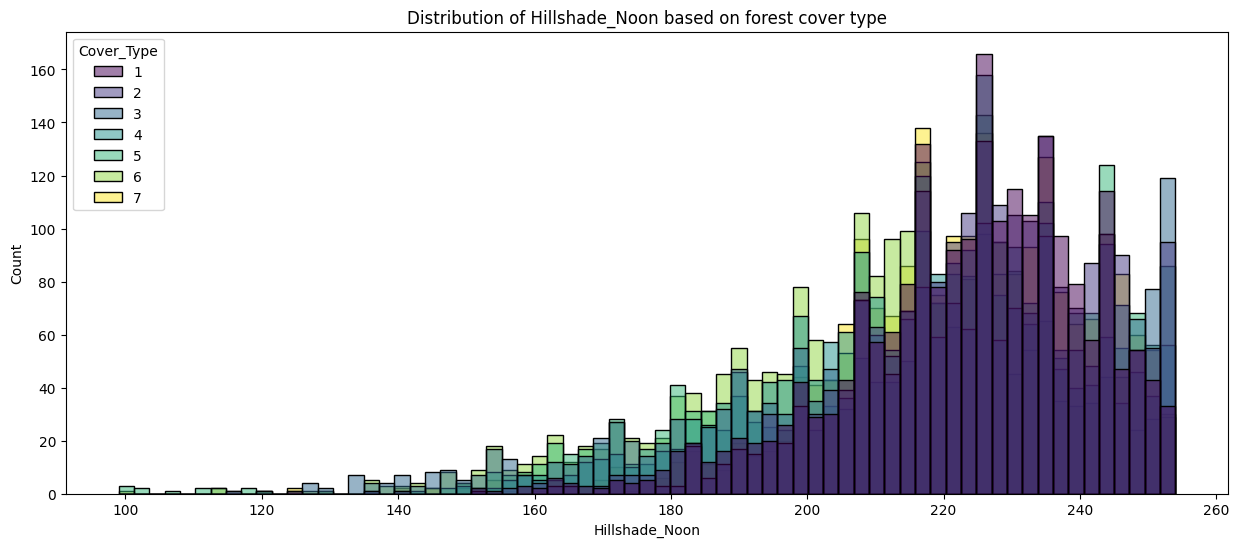

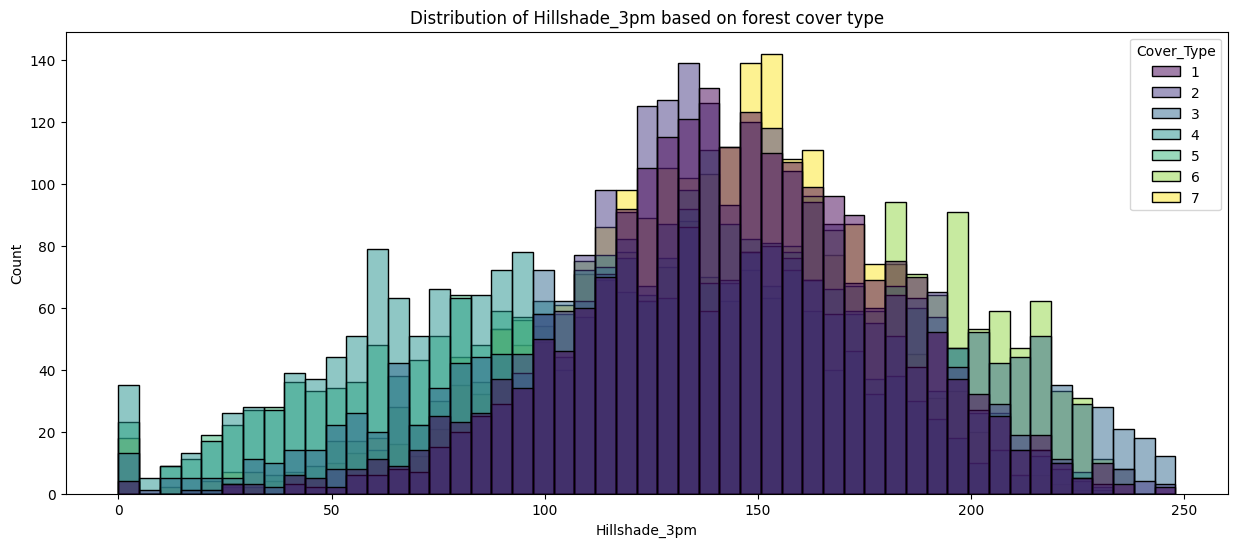

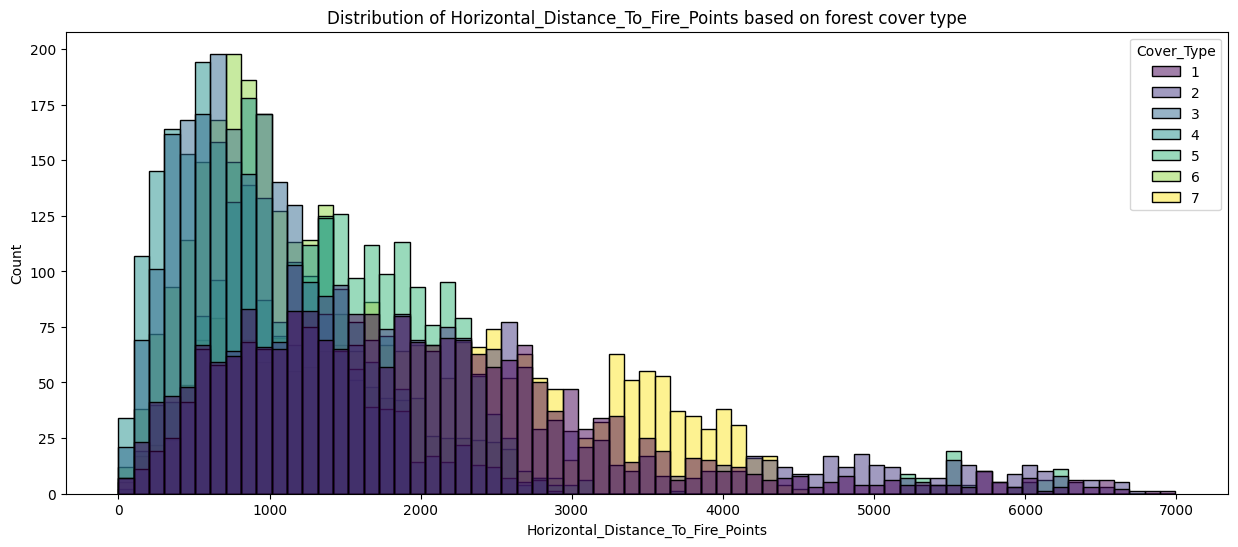

In [70]:
## Explore data distribution based on each cover type
cols = df.iloc[:,1:11].columns
for col in cols:
    plt.figure(figsize=(15,6))

    # Histogram
    sns.histplot(x=col, hue='Cover_Type', data=df, palette="viridis")
    plt.title(f"Distribution of {col} based on forest cover type")

### Feature selection

In [71]:
# Drop id from the dataset as it does not comes into picture :)
df.drop('Id', axis=1, inplace=True)
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [72]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


C:\Users\DELL\AppData\Local\Temp\ipykernel_6080\3626543487.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,2))


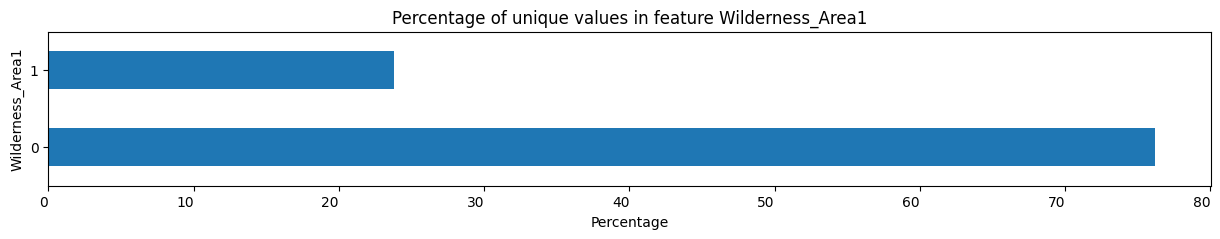

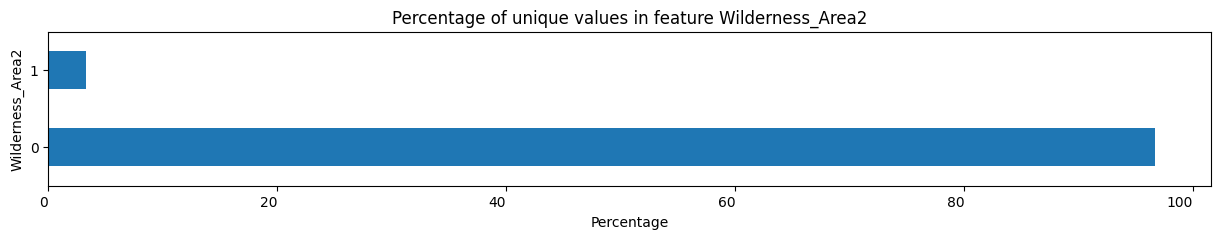

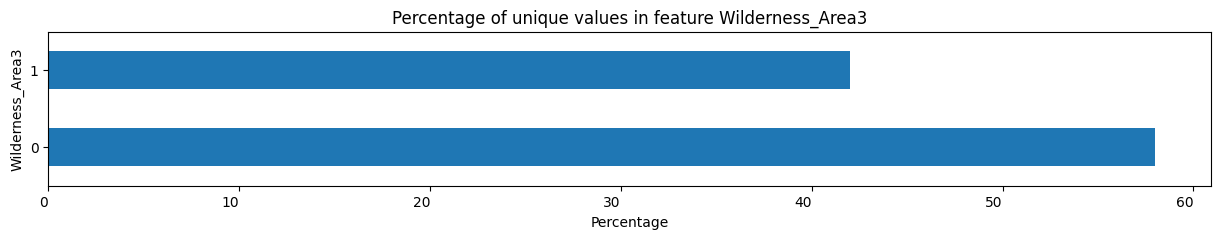

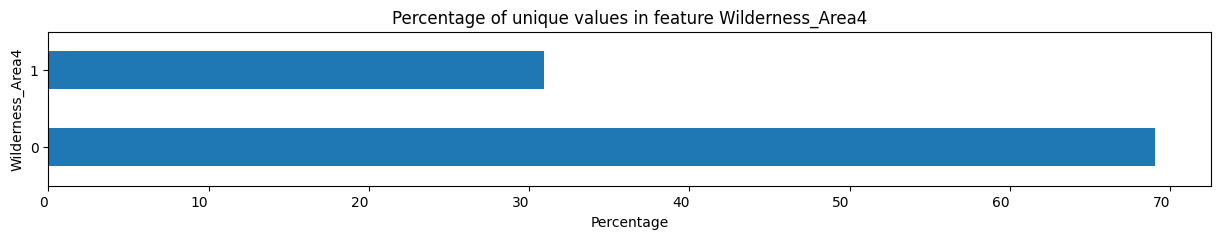

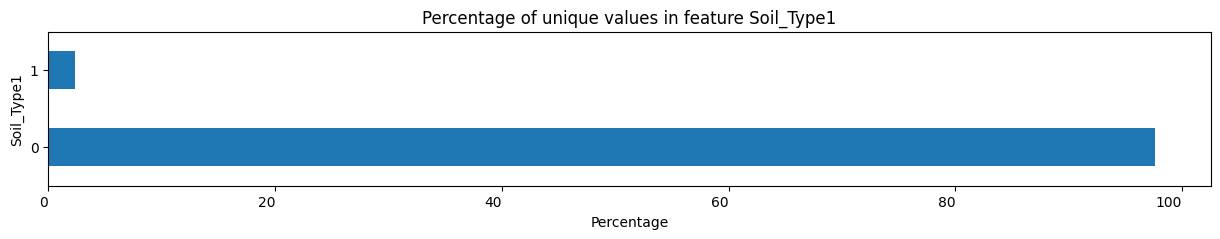

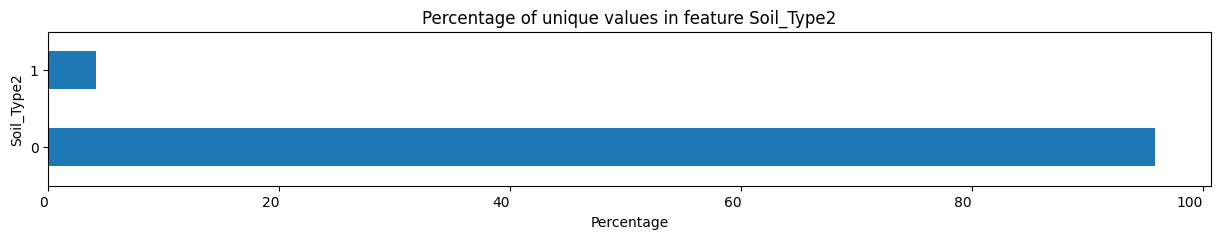

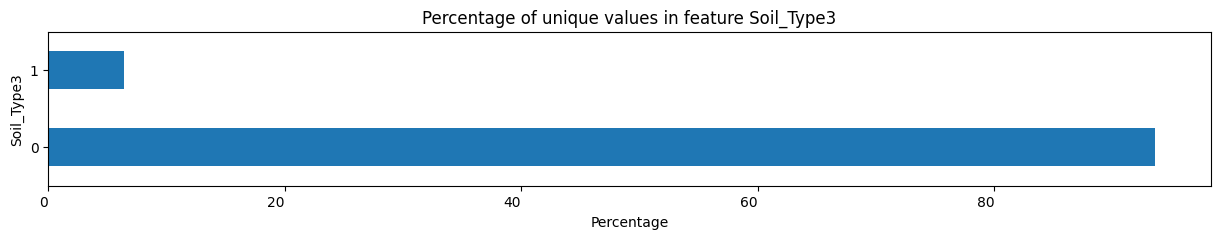

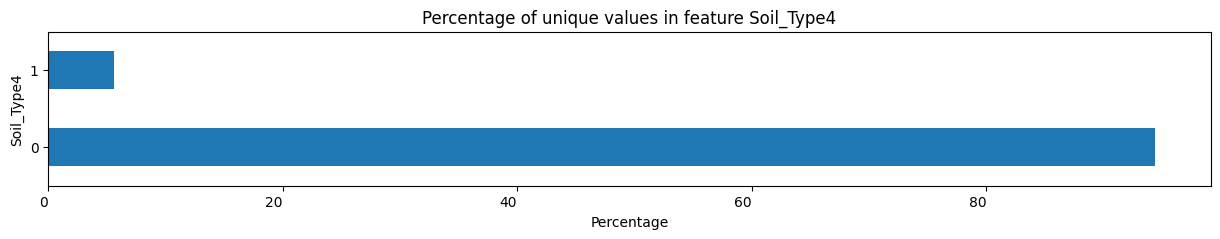

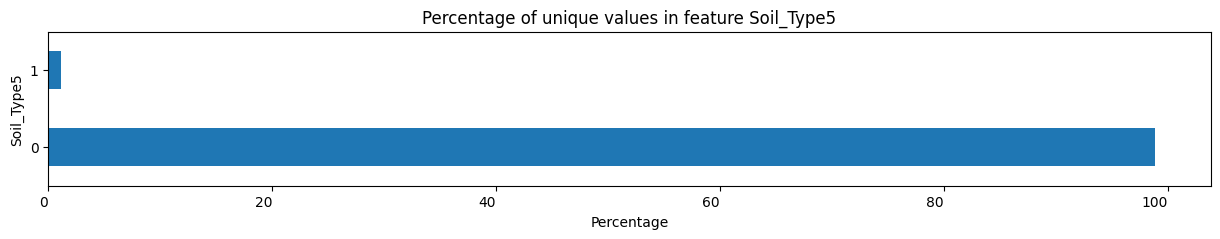

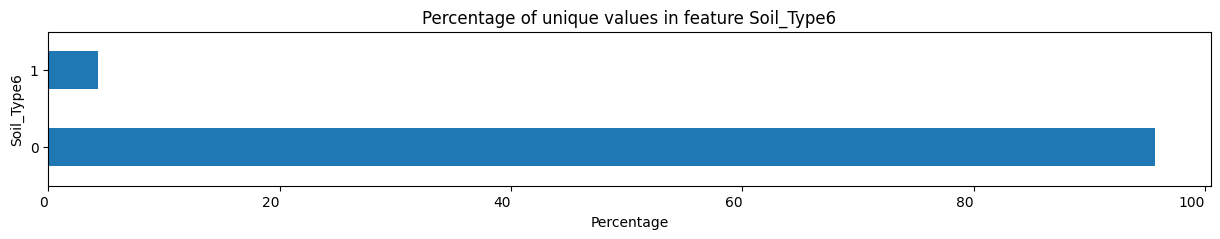

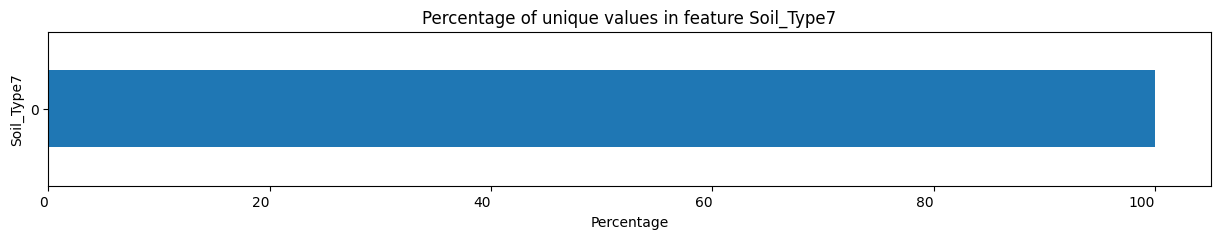

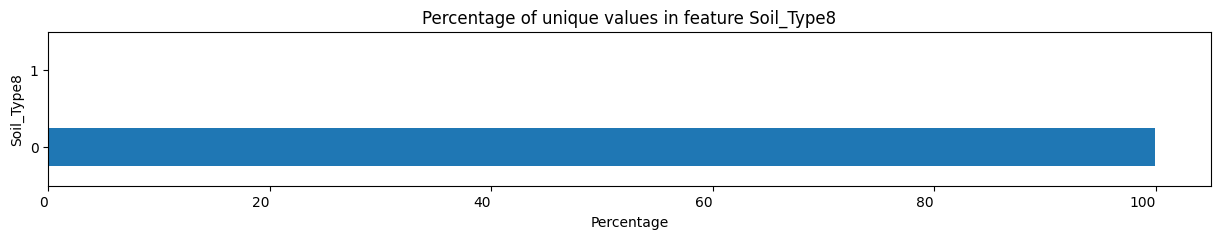

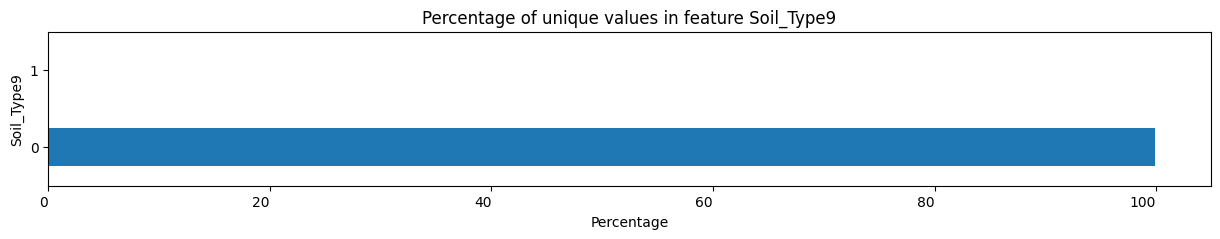

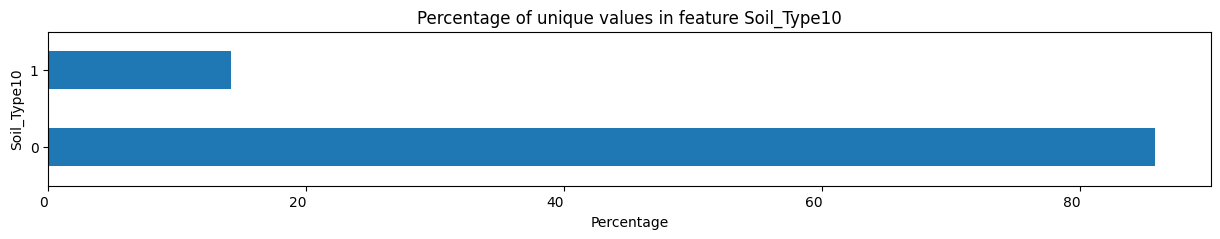

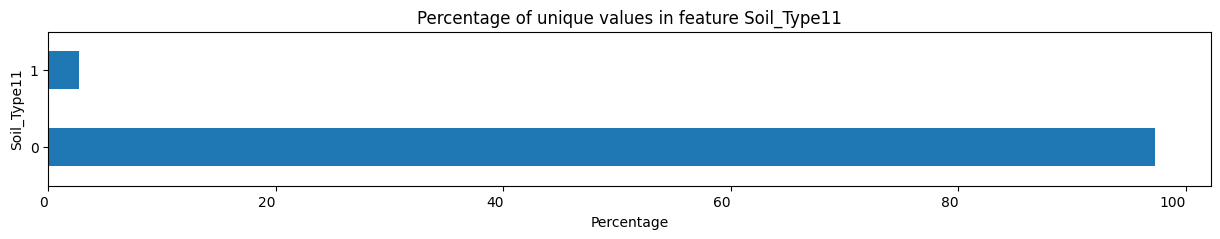

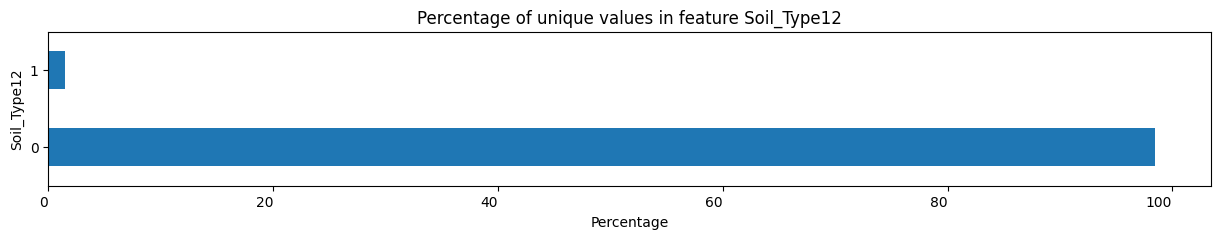

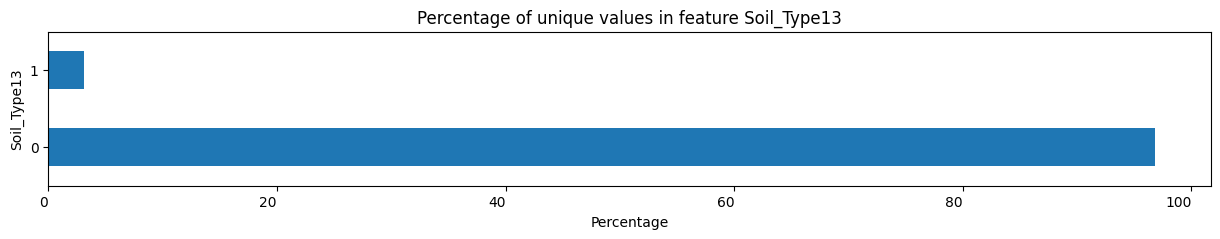

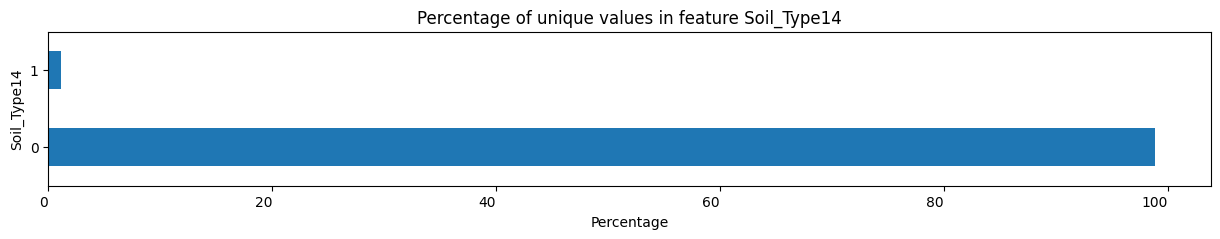

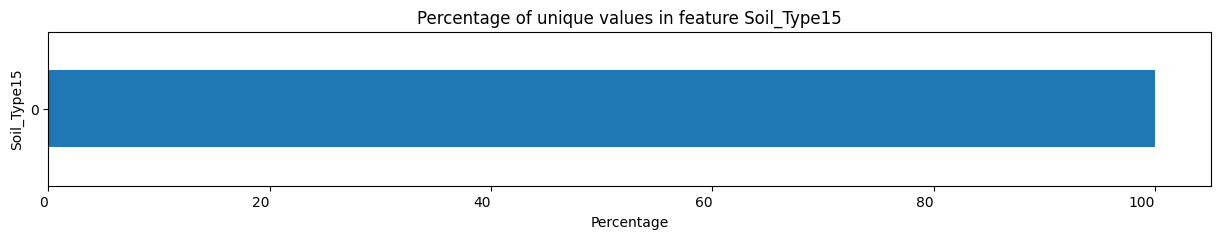

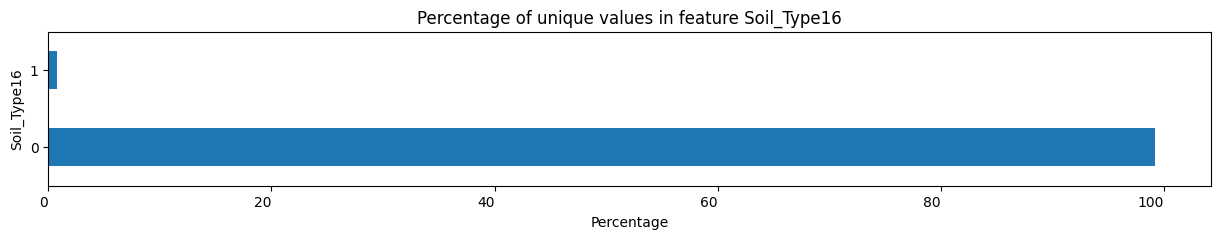

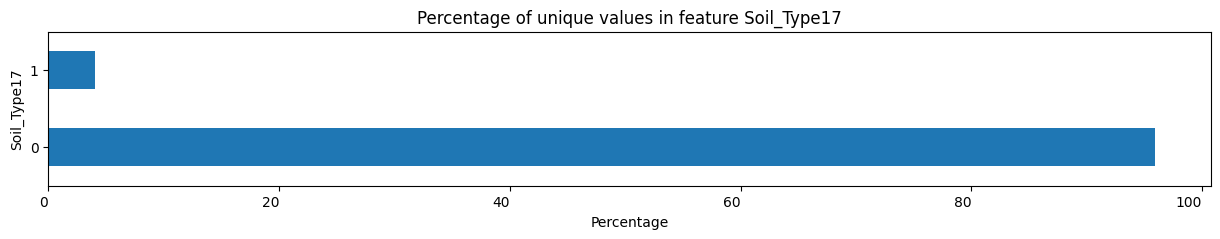

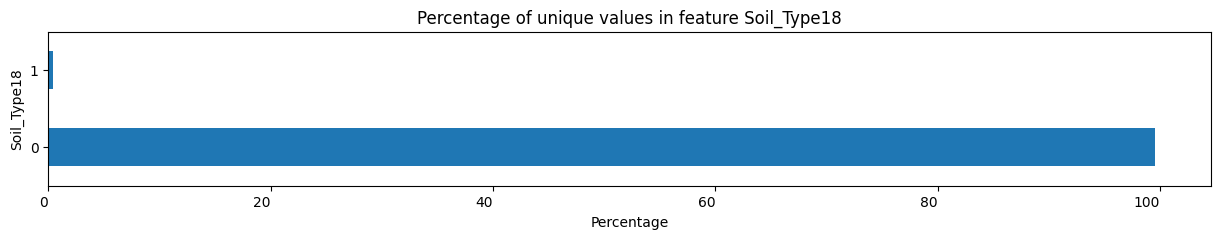

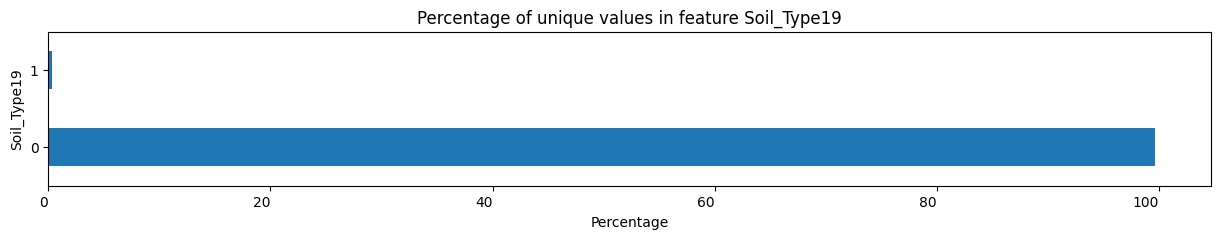

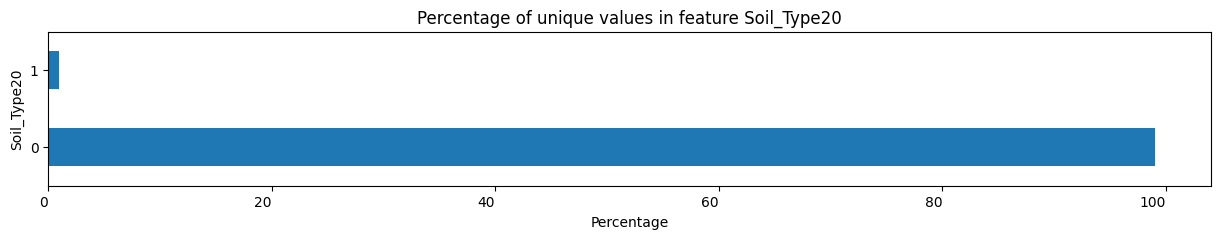

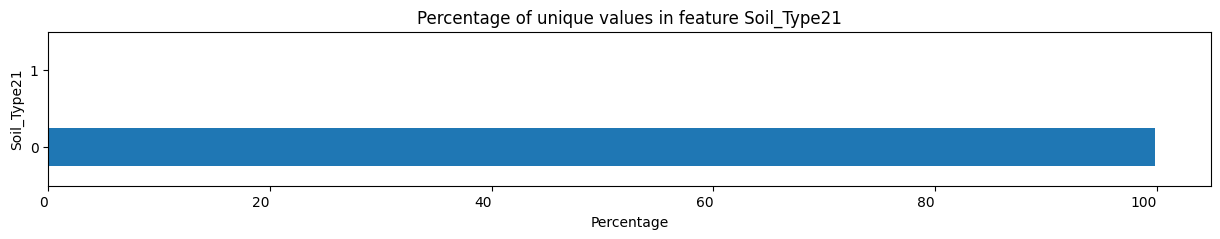

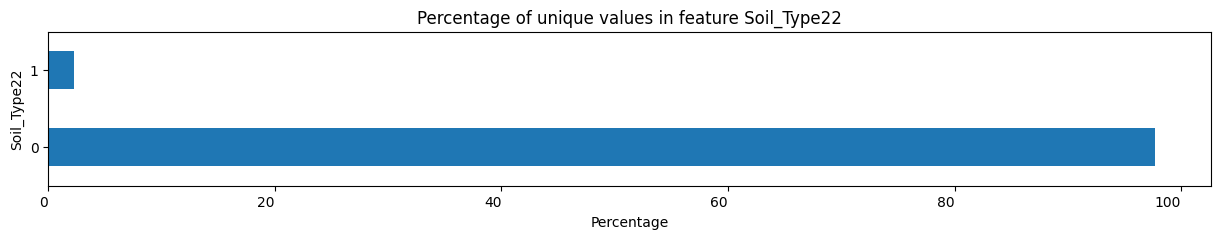

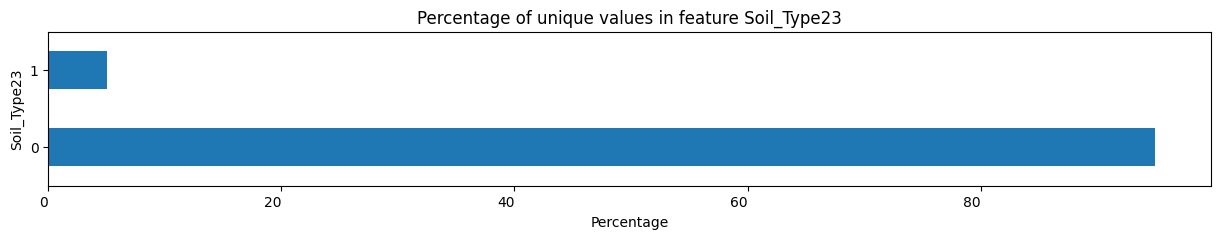

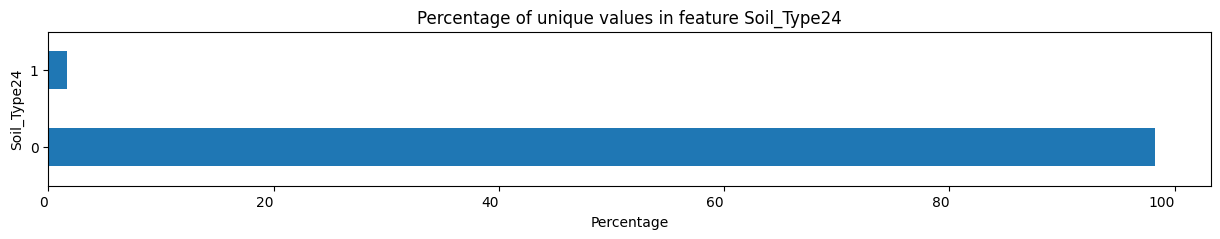

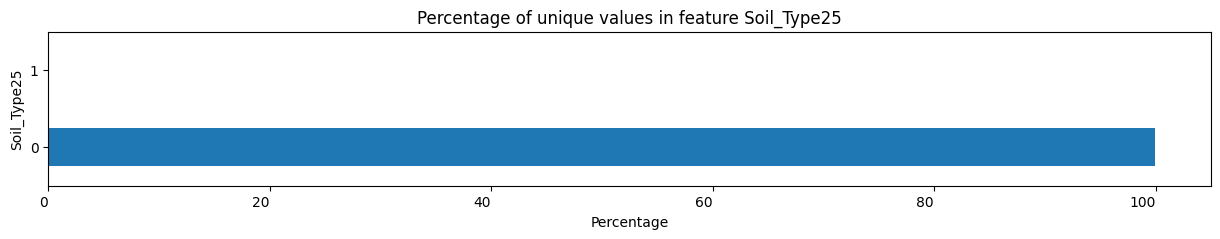

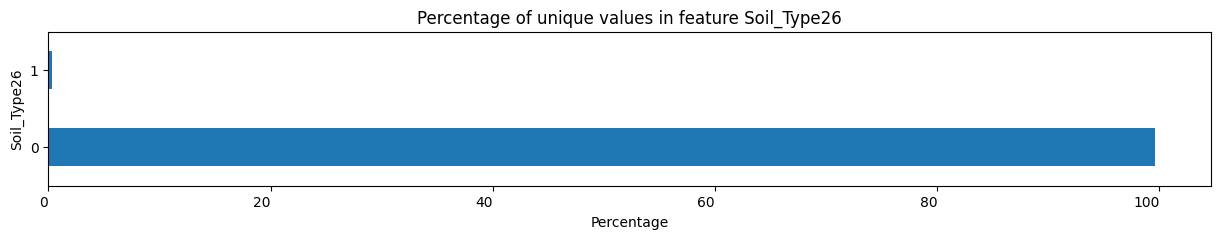

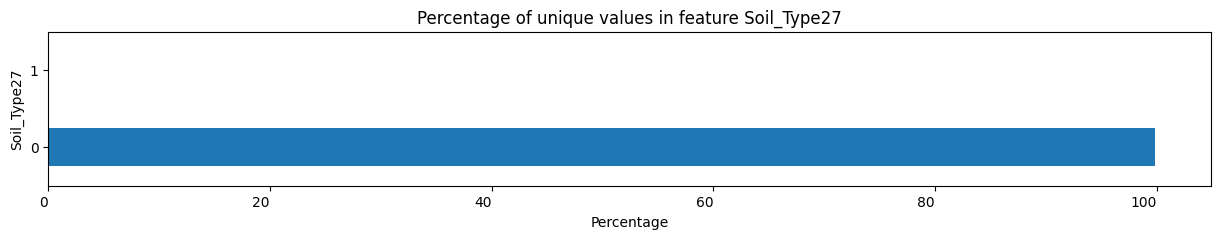

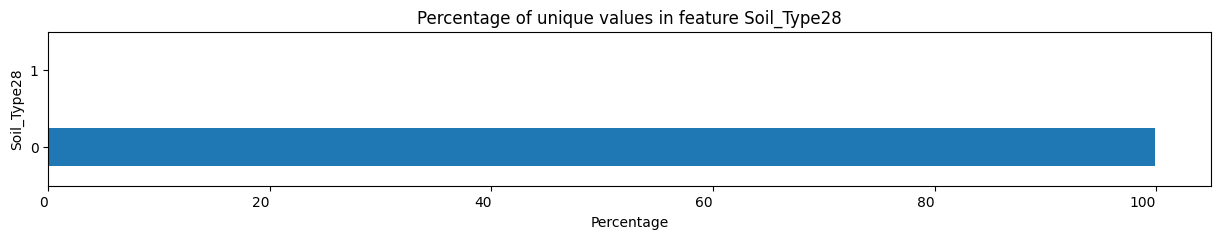

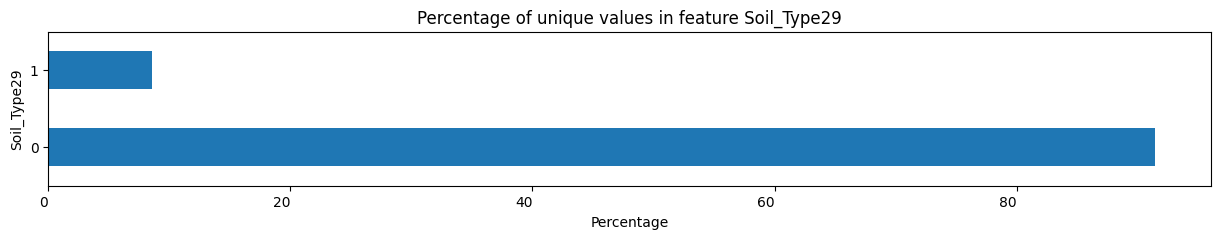

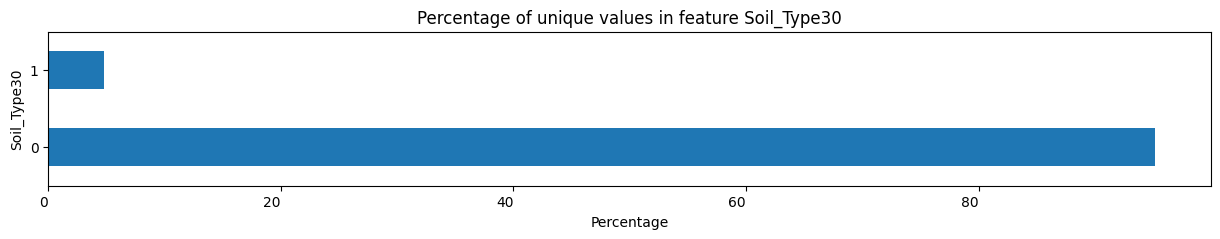

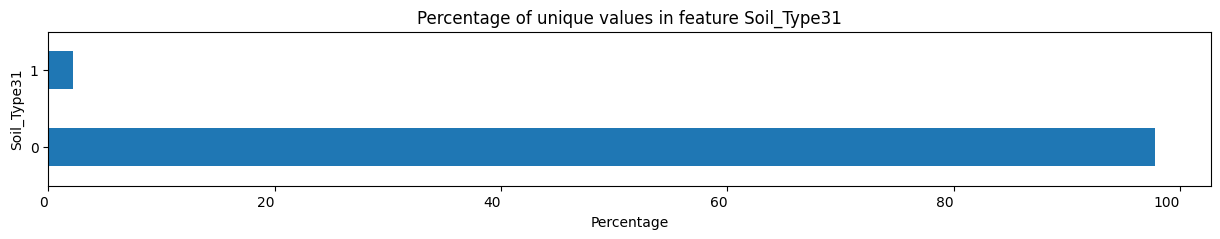

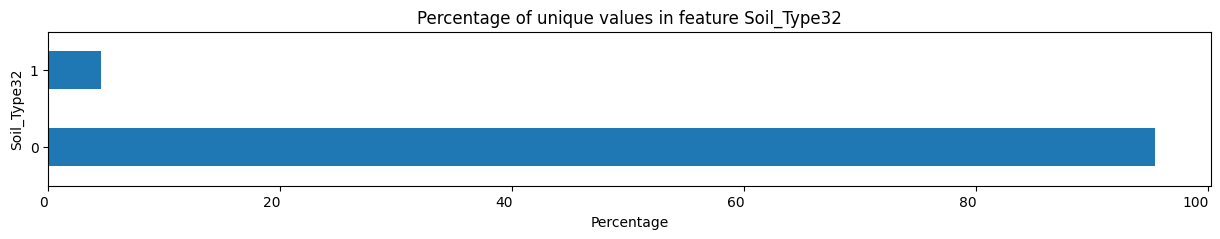

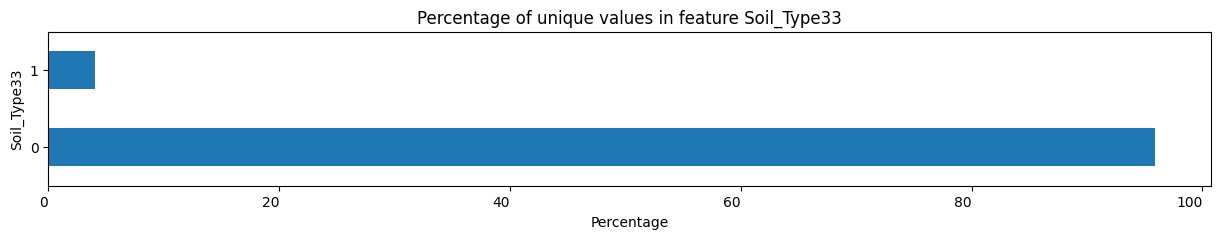

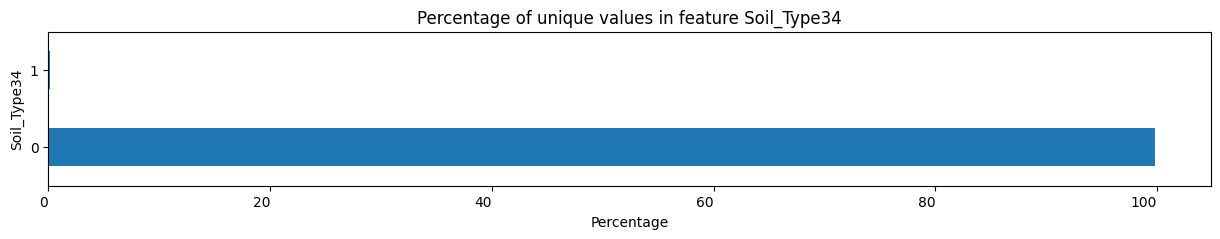

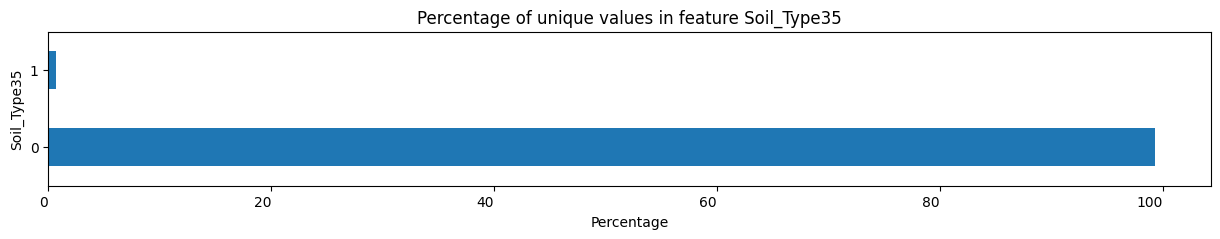

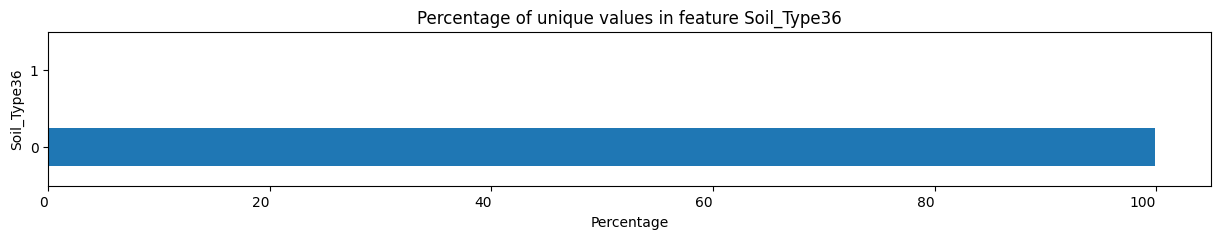

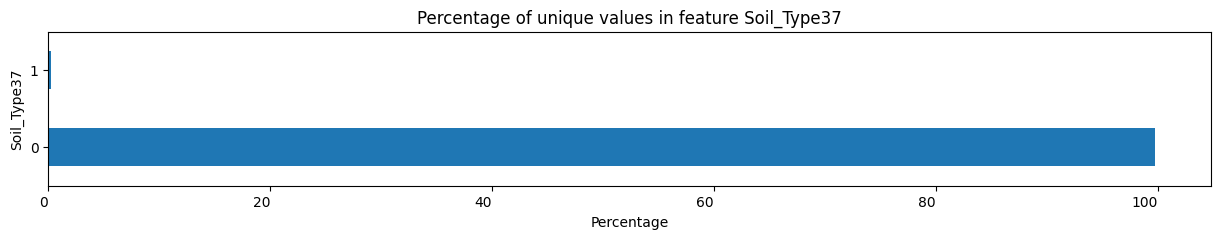

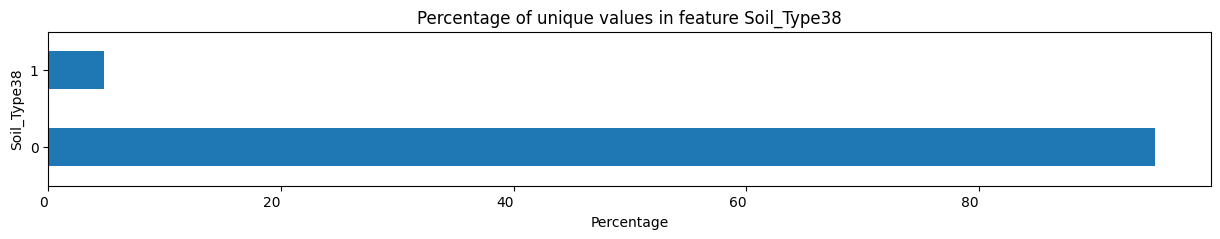

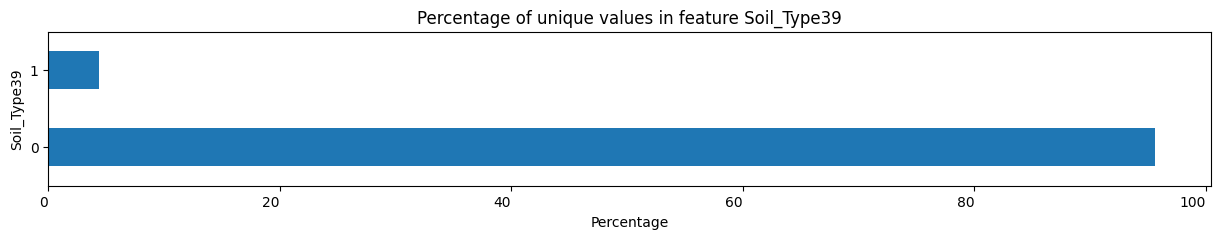

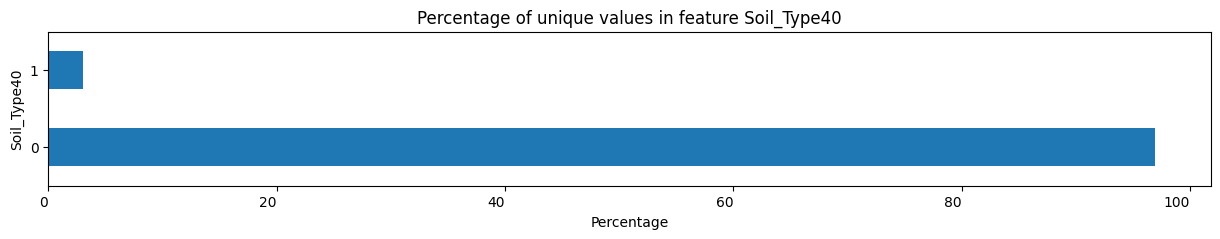

In [73]:
## Check for unique values in encoded columns
binary_cols = df.iloc[:,10:-1].columns

for i, col in enumerate(binary_cols):
    val_ct = df[col].value_counts(normalize=True)*100
    plt.figure(figsize=(15,2))
    val_ct.plot(kind='barh')
    plt.xlabel('Percentage')
    plt.title(f"Percentage of unique values in feature {col}")
    plt.xticks(rotation=0, ha='right');

**Comment:**

We are seeing that many soli_type columns are very imbalance. For some soil_type features class 1 is very low even more than 0.2% of all observations. I think those are creating noise to our model rather than single. So, we can drop those columns.

In [ ]:
# Cols those contains 0 or 1 less than 2%
noise_col = [
    col 
    for col in binary_cols 
    if df[col].value_counts(normalize=True).get(1, 0) < 0.02
]

print(len(noise_col))
noise_col

21


['Soil_Type5',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type12',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37']

**Comment:**

So, we are seeing that there are 17 columns among 40 soil_type column that contains 0 or 1 less than 1% of their total observations. So, those are not adding so much values to the model. We should drop those.

In [76]:
# Drop unnessary soil columns
df.drop(columns=noise_col, inplace=True)

print(df.shape)
df.head()

(15120, 34)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type23,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,1,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,1,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,1,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,1,0,0,0,0,0,0,0,5


## Data Splitting

In [77]:
# split data into X and y
X = df.iloc[:,:-1]
y = df['Cover_Type']

# Shape
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (15120, 33)
y shape:  (15120,)


In [80]:
# Split into train, validation and test set
X_tv, X_test, y_tv, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    stratify=y,
    random_state=42
)

# Further split into train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_tv,
    y_tv,
    test_size=0.2,
    stratify=y_tv,
    random_state=42
)

# Shape
print("X_trian_shape: ", X_train.shape)
print("y_trian_shape: ", y_train.shape)
print("X_val_shape: ", X_val.shape)
print("y_val_shape: ", y_val.shape)
print("X_test_shape: ", X_test.shape)
print("y_test_shape: ", y_test.shape)

X_trian_shape:  (10886, 33)
y_trian_shape:  (10886,)
X_val_shape:  (2722, 33)
y_val_shape:  (2722,)
X_test_shape:  (1512, 33)
y_test_shape:  (1512,)


In [81]:
# Let's confirm for data balance
y_train.value_counts(normalize=True)

Cover_Type
1    0.142936
7    0.142844
6    0.142844
2    0.142844
4    0.142844
5    0.142844
3    0.142844
Name: proportion, dtype: float64

## Model pipeline and Evalution
### Model builiding

In [82]:
# Model pipeline
logis_pipeline = make_pipeline(
    StandardScaler(),
    # PCA(random_state=42),
    LogisticRegression(max_iter=500)
)

# Fit data into the pipeline
logis_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=500))])

### Evaluation

In [83]:
# Training evaluation
y_val_pred = logis_pipeline.predict(X_val)

# Check accuracy
print(classification_report(y_pred=y_val_pred, y_true=y_val))

              precision    recall  f1-score   support

           1       0.66      0.68      0.67       388
           2       0.60      0.53      0.56       389
           3       0.62      0.56      0.59       389
           4       0.79      0.84      0.82       389
           5       0.72      0.75      0.73       389
           6       0.61      0.66      0.63       389
           7       0.87      0.89      0.88       389

    accuracy                           0.70      2722
   macro avg       0.70      0.70      0.70      2722
weighted avg       0.70      0.70      0.70      2722



In [84]:
# Testing evaluation
y_test_pred = logis_pipeline.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.64      0.69      0.66       216
           2       0.55      0.51      0.53       216
           3       0.58      0.52      0.55       216
           4       0.82      0.91      0.86       216
           5       0.72      0.68      0.70       216
           6       0.59      0.62      0.60       216
           7       0.89      0.89      0.89       216

    accuracy                           0.69      1512
   macro avg       0.68      0.69      0.69      1512
weighted avg       0.68      0.69      0.69      1512



**Comment:**

Performance is not so good. Let's try with Decision Tree Classifier

## Decision Tree Classifier

In [94]:
# Model pipeline
dtc_pipeline = make_pipeline(
    StandardScaler(),
    # PCA(n_components=0.95,random_state=42),
    DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=42)
)

# Fit data into the pipeline
dtc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=15, min_samples_leaf=2,
                                        random_state=42))])

In [96]:
# Validation evaluation
y_val_pred = dtc_pipeline.predict(X_val)

# Check accuracy
print(classification_report(y_pred=y_val_pred, y_true=y_val))

              precision    recall  f1-score   support

           1       0.62      0.65      0.64       388
           2       0.61      0.58      0.60       389
           3       0.71      0.72      0.72       389
           4       0.89      0.92      0.90       389
           5       0.85      0.88      0.87       389
           6       0.77      0.71      0.74       389
           7       0.90      0.89      0.89       389

    accuracy                           0.77      2722
   macro avg       0.77      0.77      0.76      2722
weighted avg       0.77      0.77      0.76      2722



In [97]:
# Testing evaluation
y_test_pred = dtc_pipeline.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.63      0.71      0.67       216
           2       0.63      0.59      0.61       216
           3       0.69      0.75      0.72       216
           4       0.92      0.91      0.91       216
           5       0.84      0.86      0.85       216
           6       0.75      0.70      0.72       216
           7       0.92      0.85      0.89       216

    accuracy                           0.77      1512
   macro avg       0.77      0.77      0.77      1512
weighted avg       0.77      0.77      0.77      1512



**Comment:**

Performance is also not as expected. Let's try to tune the hyperparameters.


In [98]:
dtc_pipeline.named_steps

{'standardscaler': StandardScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=42)}

In [104]:
# Use grid search CV
params_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],  
    'decisiontreeclassifier__max_features': [25, 30, 34],
    'decisiontreeclassifier__max_depth': [15, 20, 30],
    # 'decisiontreeclassifier__min_samples_leaf': [2],
}

# Instantiate grid search CV
dt_grid = GridSearchCV(
    dtc_pipeline, 
    params_grid, 
    scoring='accuracy'
)

# Fit the data
dt_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=15,
                                                               min_samples_leaf=2,
                                                               random_state=42))]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [15, 20, 30],
                         'decisiontreeclassifier__max_features': [25, 30, 34]},
             scoring='accuracy')

In [105]:
# Get the best dt classifier
best_dtc = dt_grid.best_estimator_

print(best_dtc)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                        max_features=34, min_samples_leaf=2,
                                        random_state=42))])


In [106]:
# Validation evaluation
y_val_pred = best_dtc.predict(X_val)

# Check accuracy
print(classification_report(y_pred=y_val_pred, y_true=y_val))

              precision    recall  f1-score   support

           1       0.64      0.70      0.67       388
           2       0.63      0.60      0.61       389
           3       0.73      0.74      0.74       389
           4       0.91      0.90      0.90       389
           5       0.87      0.86      0.86       389
           6       0.78      0.77      0.77       389
           7       0.89      0.89      0.89       389

    accuracy                           0.78      2722
   macro avg       0.78      0.78      0.78      2722
weighted avg       0.78      0.78      0.78      2722



In [107]:
# Testing evaluation
y_test_pred = best_dtc.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.61      0.68      0.64       216
           2       0.59      0.56      0.57       216
           3       0.65      0.75      0.70       216
           4       0.92      0.89      0.91       216
           5       0.86      0.85      0.85       216
           6       0.76      0.66      0.71       216
           7       0.90      0.88      0.89       216

    accuracy                           0.75      1512
   macro avg       0.76      0.75      0.75      1512
weighted avg       0.76      0.75      0.75      1512



**Comment:** 

Accuracy is low and there is overfitting.

## Random Forest Classifier

In [ ]:
# Model pipeline
rfc_pipeline = make_pipeline(
    StandardScaler(),
    # SelectKBest(f_classif, k=34),
    RandomForestClassifier(
        n_estimators=300,
        min_samples_leaf=2,
        max_features='sqrt',
        n_jobs=-1,
        random_state=0
    )
)

# Fit data into the pipeline
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=2, n_estimators=300,
                                        n_jobs=-1, random_state=0))])

In [139]:
# Validation evaluation
y_val_pred = rfc_pipeline.predict(X_val)

# Check accuracy
print(classification_report(y_pred=y_val_pred, y_true=y_val))

              precision    recall  f1-score   support

           1       0.76      0.74      0.75       388
           2       0.76      0.68      0.72       389
           3       0.82      0.77      0.80       389
           4       0.92      0.96      0.94       389
           5       0.88      0.94      0.91       389
           6       0.81      0.85      0.83       389
           7       0.93      0.96      0.94       389

    accuracy                           0.84      2722
   macro avg       0.84      0.84      0.84      2722
weighted avg       0.84      0.84      0.84      2722



In [140]:
# Testing evaluation
y_test_pred = rfc_pipeline.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.76      0.79      0.78       216
           2       0.73      0.60      0.66       216
           3       0.80      0.81      0.80       216
           4       0.93      0.98      0.95       216
           5       0.86      0.91      0.88       216
           6       0.84      0.83      0.84       216
           7       0.94      0.94      0.94       216

    accuracy                           0.84      1512
   macro avg       0.83      0.84      0.84      1512
weighted avg       0.83      0.84      0.84      1512



**Comment:**

There is slight improvement in the model performance with Random Forest Classifier. Let's try to fine tune the model hyperparameters.

### Hyperparameter Tuning

In [141]:
# Hyperparameter grid
rf_param_grid = {
    'randomforestclassifier__n_estimators': [200,300,400],
    # 'randomforestclassifier__max_depth': [15, 20, 30],
    'randomforestclassifier__min_samples_leaf': [2, 4, 6],
    'randomforestclassifier__max_features': ['sqrt']
}

# Instantiate grid
rf_grid = GridSearchCV(rfc_pipeline, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(rf_grid.best_params_, rf_grid.best_score_)

{'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 400} 0.8407125499788464


In [142]:
# get the best model
best_model = rf_grid.best_estimator_

In [143]:
# Validation evaluation
y_val_pred = best_model.predict(X_val)

# Check accuracy
print(classification_report(y_pred=y_val_pred, y_true=y_val))

              precision    recall  f1-score   support

           1       0.78      0.74      0.76       388
           2       0.76      0.70      0.73       389
           3       0.82      0.78      0.80       389
           4       0.92      0.96      0.94       389
           5       0.88      0.94      0.91       389
           6       0.81      0.84      0.83       389
           7       0.93      0.96      0.94       389

    accuracy                           0.85      2722
   macro avg       0.84      0.85      0.84      2722
weighted avg       0.84      0.85      0.84      2722



In [144]:
# Testing evaluation
y_test_pred = best_model.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.75      0.79      0.77       216
           2       0.74      0.59      0.65       216
           3       0.80      0.79      0.79       216
           4       0.91      0.98      0.94       216
           5       0.86      0.92      0.89       216
           6       0.82      0.83      0.83       216
           7       0.94      0.95      0.94       216

    accuracy                           0.83      1512
   macro avg       0.83      0.83      0.83      1512
weighted avg       0.83      0.83      0.83      1512



**Comment:**

There is slight improvement in the overall performance of the model

## Ada Boosting

In [151]:
# Instantiate ada boost classifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, random_state=42),
    n_estimators=200,
    learning_rate=0.01,
    random_state=42
)

# Make pipeline
ada_pipeline = make_pipeline(
    StandardScaler(),
    ada_clf
)

# Fit the data
ada_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=30,
                                                                     min_samples_leaf=2,
                                                                     random_state=42),
                                    learning_rate=0.01, n_estimators=200,
                                    random_state=42))])

In [152]:
# Validation evaluation
y_val_pred = ada_pipeline.predict(X_val)

# Check accuracy
print(classification_report(y_pred=y_val_pred, y_true=y_val))

              precision    recall  f1-score   support

           1       0.76      0.72      0.74       388
           2       0.73      0.70      0.72       389
           3       0.83      0.80      0.81       389
           4       0.92      0.95      0.94       389
           5       0.88      0.95      0.92       389
           6       0.83      0.85      0.84       389
           7       0.93      0.94      0.94       389

    accuracy                           0.84      2722
   macro avg       0.84      0.84      0.84      2722
weighted avg       0.84      0.84      0.84      2722



In [153]:
# Testing evaluation
y_test_pred = ada_pipeline.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.69      0.69      0.69       216
           2       0.68      0.59      0.63       216
           3       0.81      0.83      0.82       216
           4       0.94      0.94      0.94       216
           5       0.87      0.92      0.89       216
           6       0.83      0.85      0.84       216
           7       0.92      0.90      0.91       216

    accuracy                           0.82      1512
   macro avg       0.82      0.82      0.82      1512
weighted avg       0.82      0.82      0.82      1512



**Comment:**

Accuracy is not still improving. Let's try to do some feature engineering further.

## Feature Engineering Again
### Feature importance

In [160]:
feat = ada_pipeline.named_steps['standardscaler'].get_feature_names_out()
imp = ada_pipeline.named_steps['adaboostclassifier'].feature_importances_

# Series
feat_imp = pd.Series(data=imp, index=feat).sort_values(key=abs)

# Top 10 features
feat_imp.tail(10).sort_values(ascending=False)

Elevation                             0.401260
Horizontal_Distance_To_Fire_Points    0.097389
Horizontal_Distance_To_Roadways       0.095099
Horizontal_Distance_To_Hydrology      0.069948
Hillshade_9am                         0.059128
Vertical_Distance_To_Hydrology        0.043936
Hillshade_Noon                        0.038770
Aspect                                0.038695
Hillshade_3pm                         0.029731
Slope                                 0.024239
dtype: float64

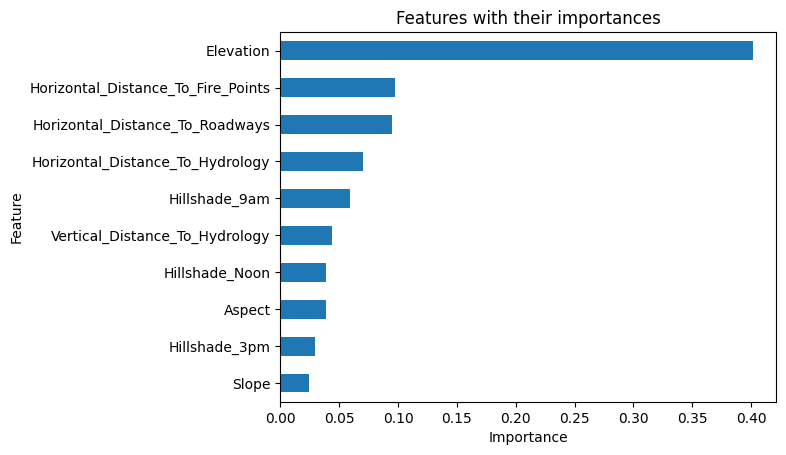

In [162]:
# Plot
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Features with their importances")
plt.show()

### Check for Multicollinearity

In [ ]:
df.iloc[:,:10].head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


<Axes: >

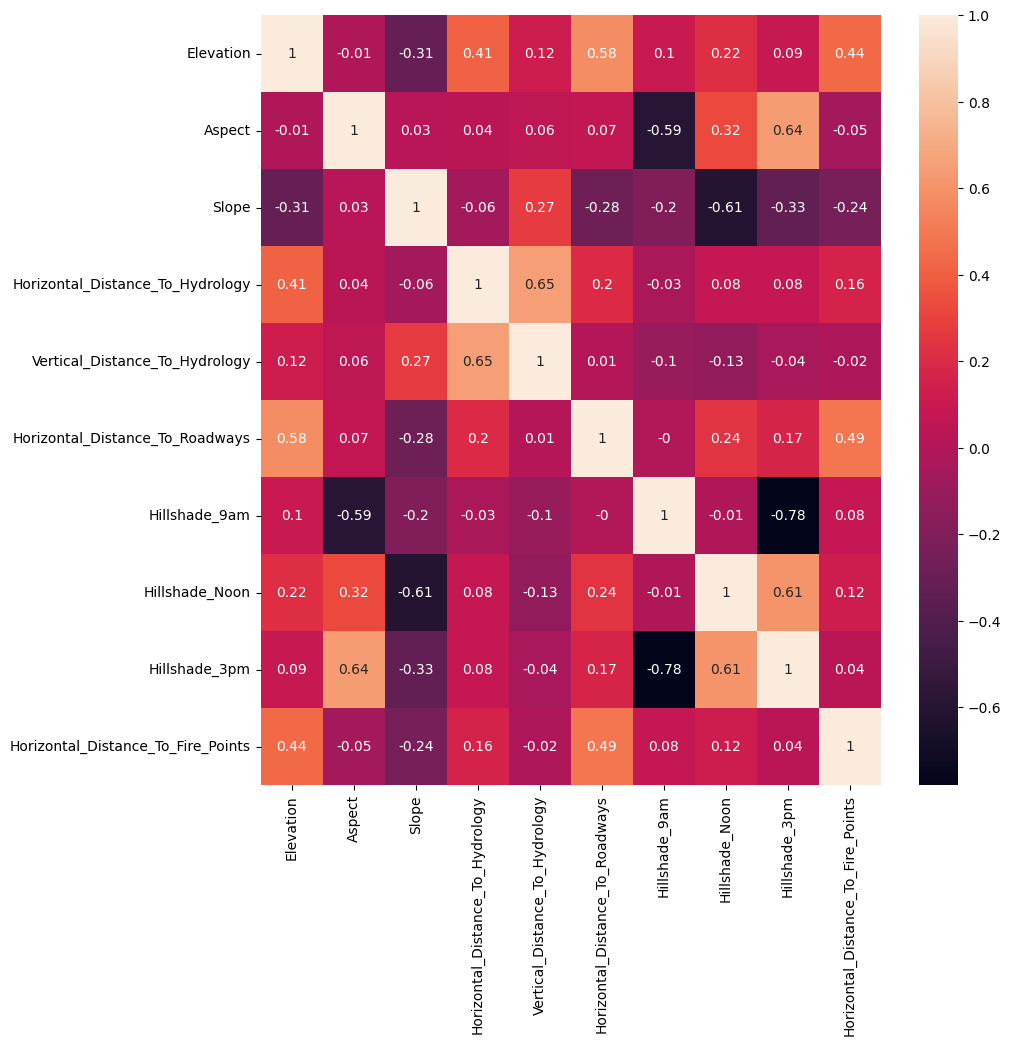

In [170]:
# Multicollinearity
num_df = df.iloc[:,:10]
plt.figure(figsize=(10,10))
sns.heatmap(num_df.corr().round(2), annot=True)

In [171]:
df.iloc[:,:10].head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


**Comment:**

* Features "Hillshade_3pm" and "Hillshade_9am" are highly negatively correlated (-0.78)
* Features "Vertical_Distance_To_Hydrology" and "Horizontal_Distance_To_Hydrology" are positively correleted (0.65)
* "Hillshade_3pm" and "Aspect" are also correleted (0.64)
* "Hillshade_3pm" and "Hillshade_Noon" are also correleted (0.61)

So, i am thinking to combine "Hillshade_3pm" and "Hillshade_9am" and summarize "Hillshade_9am", "Hillshade_Noon" and "Hillshade_3pm" to solve the correlation problem.

In [ ]:
# custom transformer to combine distances & hillshade
def featurize(df):
    X = df.copy()
    # combine hydrology
    X['Dist_to_Hydro'] = np.hypot(
        X.Horizontal_Distance_To_Hydrology,
        X.Vertical_Distance_To_Hydrology
    )
    # drop the originals
    X = X.drop(
        ['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'], axis=1
    )
    # summary of hillshade
    X['Hillshade_range'] = (
        X[['Hillshade_9am','Hillshade_Noon','Hillshade_3pm']].max(axis=1) -
        X[['Hillshade_9am','Hillshade_Noon','Hillshade_3pm']].min(axis=1)
    )
    X = X.drop(['Hillshade_9am','Hillshade_Noon','Hillshade_3pm'], axis=1)
    return X.values

# Call the function transformer
fe = FunctionTransformer(featurize)

# pipeline
log_pipe = Pipeline([
  ('fe', fe),
  ('scaler', StandardScaler()),
  ('lg', LogisticRegression(max_iter=200))
])

# Fit the pipeline
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('fe',
                 FunctionTransformer(func=<function featurize at 0x000001F1085967A0>)),
                ('scaler', StandardScaler()),
                ('lg', LogisticRegression(max_iter=200))])

In [177]:
# Validation evaluation
y_val_pred = log_pipe.predict(X_val)

# Check accuracy
print(classification_report(y_pred=y_val_pred, y_true=y_val))

              precision    recall  f1-score   support

           1       0.66      0.66      0.66       388
           2       0.60      0.53      0.56       389
           3       0.60      0.54      0.57       389
           4       0.78      0.84      0.81       389
           5       0.70      0.74      0.72       389
           6       0.62      0.64      0.63       389
           7       0.87      0.89      0.88       389

    accuracy                           0.69      2722
   macro avg       0.69      0.69      0.69      2722
weighted avg       0.69      0.69      0.69      2722



In [178]:
# Testing evaluation
y_test_pred = log_pipe.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.63      0.69      0.66       216
           2       0.53      0.49      0.51       216
           3       0.58      0.50      0.53       216
           4       0.80      0.89      0.84       216
           5       0.70      0.68      0.69       216
           6       0.58      0.62      0.60       216
           7       0.90      0.89      0.90       216

    accuracy                           0.68      1512
   macro avg       0.68      0.68      0.68      1512
weighted avg       0.68      0.68      0.68      1512



### DTC

In [181]:
# pipeline
dtc_pipe = Pipeline([
  ('fe', fe),
  ('scaler', StandardScaler()),
  ('dtc', DecisionTreeClassifier(random_state=0))
])

# Fit the pipeline
dtc_pipe.fit(X_train, y_train)

Pipeline(steps=[('fe',
                 FunctionTransformer(func=<function featurize at 0x000001F1085967A0>)),
                ('scaler', StandardScaler()),
                ('dtc', DecisionTreeClassifier(random_state=0))])

In [182]:
# Validation evaluation
y_val_pred = dtc_pipe.predict(X_val)

# Check accuracy
print(classification_report(y_pred=y_val_pred, y_true=y_val))

              precision    recall  f1-score   support

           1       0.67      0.69      0.68       388
           2       0.66      0.61      0.63       389
           3       0.72      0.69      0.71       389
           4       0.90      0.90      0.90       389
           5       0.85      0.90      0.88       389
           6       0.75      0.74      0.74       389
           7       0.90      0.93      0.91       389

    accuracy                           0.78      2722
   macro avg       0.78      0.78      0.78      2722
weighted avg       0.78      0.78      0.78      2722



In [183]:
# Testing evaluation
y_test_pred = dtc_pipe.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.67      0.64      0.65       216
           2       0.62      0.61      0.62       216
           3       0.71      0.74      0.72       216
           4       0.92      0.91      0.91       216
           5       0.83      0.86      0.85       216
           6       0.76      0.74      0.75       216
           7       0.90      0.93      0.91       216

    accuracy                           0.77      1512
   macro avg       0.77      0.77      0.77      1512
weighted avg       0.77      0.77      0.77      1512



### RFC

In [185]:
# pipeline
rfc_pipe = Pipeline([
  ('fe', fe),
  ('scaler', StandardScaler()),
  ('rfc', RandomForestClassifier(n_estimators=300, random_state=0))
])

# Fit the pipeline
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('fe',
                 FunctionTransformer(func=<function featurize at 0x000001F1085967A0>)),
                ('scaler', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(n_estimators=300, random_state=0))])

In [186]:
# Validation evaluation
y_val_pred = rfc_pipe.predict(X_val)

# Check accuracy
print(classification_report(y_pred=y_val_pred, y_true=y_val))

              precision    recall  f1-score   support

           1       0.80      0.76      0.78       388
           2       0.77      0.71      0.74       389
           3       0.85      0.79      0.82       389
           4       0.93      0.97      0.95       389
           5       0.90      0.95      0.93       389
           6       0.83      0.88      0.85       389
           7       0.94      0.98      0.96       389

    accuracy                           0.86      2722
   macro avg       0.86      0.86      0.86      2722
weighted avg       0.86      0.86      0.86      2722



In [187]:
# Testing evaluation
y_test_pred = rfc_pipe.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.78      0.81      0.80       216
           2       0.78      0.64      0.70       216
           3       0.83      0.86      0.85       216
           4       0.93      0.98      0.96       216
           5       0.88      0.93      0.90       216
           6       0.85      0.84      0.85       216
           7       0.97      0.96      0.97       216

    accuracy                           0.86      1512
   macro avg       0.86      0.86      0.86      1512
weighted avg       0.86      0.86      0.86      1512



### Ada boost

In [ ]:
# Instantiate ada boost classifier
adb = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=40, min_samples_leaf=4, random_state=40),
    n_estimators=250,
    learning_rate=0.01,
    random_state=40
)

# Make pipeline
# pipeline
ada_pipe = Pipeline([
  ('fe', fe),
  ('scaler', StandardScaler()),
  ('adb', adb)
])

# Fit the data
ada_pipe.fit(X_train, y_train)

Pipeline(steps=[('fe',
                 FunctionTransformer(func=<function featurize at 0x000001F1085967A0>)),
                ('scaler', StandardScaler()),
                ('adb',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=40,
                                                                     min_samples_leaf=4,
                                                                     random_state=40),
                                    learning_rate=0.01, n_estimators=250,
                                    random_state=40))])

In [211]:
# Validation evaluation
y_val_pred = ada_pipe.predict(X_val)

# Check accuracy
print(classification_report(y_pred=y_val_pred, y_true=y_val))

              precision    recall  f1-score   support

           1       0.79      0.78      0.78       388
           2       0.78      0.69      0.73       389
           3       0.83      0.82      0.82       389
           4       0.93      0.94      0.93       389
           5       0.89      0.96      0.92       389
           6       0.83      0.86      0.85       389
           7       0.95      0.97      0.96       389

    accuracy                           0.86      2722
   macro avg       0.86      0.86      0.86      2722
weighted avg       0.86      0.86      0.86      2722



In [212]:
# Testing evaluation
y_test_pred = ada_pipe.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.75      0.78      0.76       216
           2       0.76      0.66      0.71       216
           3       0.83      0.83      0.83       216
           4       0.96      0.97      0.96       216
           5       0.89      0.94      0.92       216
           6       0.83      0.84      0.84       216
           7       0.94      0.94      0.94       216

    accuracy                           0.85      1512
   macro avg       0.85      0.85      0.85      1512
weighted avg       0.85      0.85      0.85      1512



**Comment:**

Now our accuracy has increased than previous. Now it's time to combine all models to make it more strong.


## Stacking

In [214]:
# Bundle as “base learners”
estimators = [
    ('lr',  log_pipe),
    ('dt',  dtc_pipe),
    ('rf',  rfc_pipe),
    ('ada', ada_pipe)
]

# Create the stacking classifier
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=500),  # meta‑learner
    cv=5,                                              # folds for blending
    n_jobs=-1,
    passthrough=False                                  # set True to include original features
)

# Fit training set
stack_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                Pipeline(steps=[('fe',
                                                 FunctionTransformer(func=<function featurize at 0x000001F1085967A0>)),
                                                ('scaler', StandardScaler()),
                                                ('lg',
                                                 LogisticRegression(max_iter=200))])),
                               ('dt',
                                Pipeline(steps=[('fe',
                                                 FunctionTransformer(func=<function featurize at 0x000001F1085967A0>)),
                                                ('scaler', StandardScaler()),
                                                ('dtc',
                                                 DecisionTreeClassi...
                                                                        random_state=0))])),
                               ('ada',
                                Pipeline(steps=[('fe',
                                                 FunctionTransformer(func=<function featurize at 0x000001F1085967A0>)),
                                                ('scaler', StandardScaler()),
                                                ('adb',
                                                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=40,
                                                                                                     min_samples_leaf=4,
                                                                                                     random_state=40),
                                                                    learning_rate=0.01,
                                                                    n_estimators=250,
                                                                    random_state=40))]))],
                   final_estimator=LogisticRegression(max_iter=500), n_jobs=-1)

In [215]:
# Validation evaluation
y_val_pred = stack_clf.predict(X_val)

# Check accuracy
print(classification_report(y_pred=y_val_pred, y_true=y_val))

              precision    recall  f1-score   support

           1       0.80      0.78      0.79       388
           2       0.75      0.74      0.74       389
           3       0.83      0.81      0.82       389
           4       0.95      0.95      0.95       389
           5       0.92      0.94      0.93       389
           6       0.84      0.87      0.85       389
           7       0.95      0.97      0.96       389

    accuracy                           0.87      2722
   macro avg       0.86      0.87      0.86      2722
weighted avg       0.86      0.87      0.86      2722



In [216]:
# Testing evaluation
y_test_pred = stack_clf.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.77      0.81      0.79       216
           2       0.74      0.69      0.71       216
           3       0.82      0.88      0.85       216
           4       0.96      0.98      0.97       216
           5       0.91      0.93      0.92       216
           6       0.88      0.83      0.85       216
           7       0.97      0.95      0.96       216

    accuracy                           0.87      1512
   macro avg       0.87      0.87      0.87      1512
weighted avg       0.87      0.87      0.87      1512



**Comment:**

Now we have got our final estimator that is stack_clf and it's performace is not so bad. We have achived the accuracy 87% for both validation and test set.

#### Confusion matrix

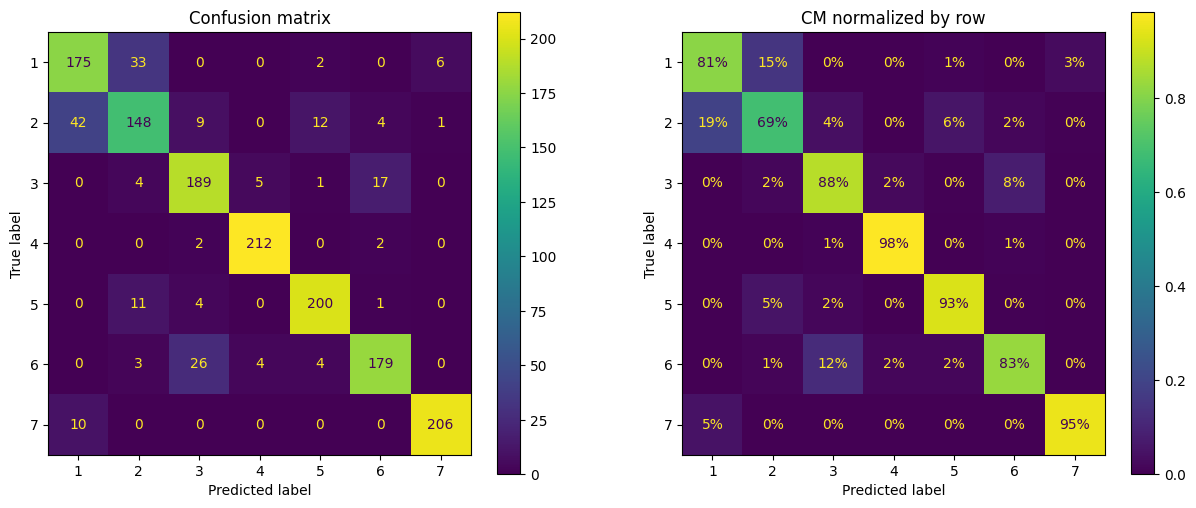

In [219]:
# Create a grid 1*2
fig, axes = plt.subplots(1,2, figsize=(15,6))

# Confusion matrix with count
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axes[0])
axes[0].set_title("Confusion matrix")

# Confusion matrix with normalization by row
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format=".0%", ax=axes[1])
axes[1].set_title("CM normalized by row");


**Comment:**

We are seeing that our final model has classified forest cover type_4 (Cottonwood/Willow) most correctly and that is 98% correct. But for cover type_2, it has loest score. Most of the cover type_2 (almost 19%) is misclassified as forest cover type_1.

## Prediction

In [230]:
# Test prediction
y_pred = stack_clf.predict(X_test)

# Make a dataframe with actual and predicted values
df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_predicted': y_pred})

# Add predicion status to the pred_df
df_pred['status'] = (df_pred["y_actual"]==df_pred["y_predicted"]).apply(lambda obs: 'Correct prediction' if obs==True else "Wrong prediction" )

# See any random 10 prediction
df_pred.sample(10)

,y_actual,y_predicted,status
5229,6,6,Correct prediction
754,2,2,Correct prediction
940,2,2,Correct prediction
5942,6,6,Correct prediction
4313,4,4,Correct prediction
3142,3,3,Correct prediction
8157,7,7,Correct prediction
255,2,2,Correct prediction
3136,4,4,Correct prediction
213,2,2,Correct prediction
